In [1]:
#my imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
pd.options.display.max_seq_items = 2000

## Grabbing and Cleaning Data

In [3]:
#cleaning and adding ghg data
ghg = pd.read_csv('../../data/dirty_data/total-ghg-emissions.csv')
ghg.drop(columns=['Code'], inplace=True)
ghg.rename(columns={"Total GHG emissions including LUCF (CAIT)":"Total GHG"}, inplace=True)
ghg = ghg[ghg['Year']>1989]
ghg = ghg[ghg['Year'] < 2015]
ghg.to_csv('../../data/new_cleaned/ghg.csv')

In [4]:
#cleaning and adding airpollution death share data
airpol_death_share = pd.read_csv('../../data/dirty_data/share-deaths-air-pollution.csv')
airpol_death_share.drop(columns=['Code'], inplace=True)
airpol_death_share.rename(columns={"Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Percent)": "Deaths %"}, inplace=True)
airpol_death_share = airpol_death_share[airpol_death_share['Year']>1989]
airpol_death_share = airpol_death_share[airpol_death_share['Year'] < 2015]
airpol_death_share.to_csv('../../data/new_cleaned/airpol_death_share.csv')

In [5]:
#cleaning and adding airpollution data
airpol = pd.read_csv('../../data/dirty_data/PM25-air-pollution.csv')
airpol.drop(columns=['Code'], inplace=True)
airpol.rename(columns={"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)": "Air Pollution"}, inplace=True)
airpol = airpol[airpol['Year']>1989]
airpol = airpol[airpol['Year'] < 2015]
airpol.to_csv('../../data/new_cleaned/airpol.csv')

In [6]:
#cleaning and adding net zero binary data
net_zero_binary = pd.read_csv('../../data/dirty_data/net-zero-target-set.csv')
net_zero_binary.drop(columns=['Code'], inplace=True)
net_zero_binary.rename(columns={"Is there a net-zero target?":"Net-Zero Target"}, inplace=True)
net_zero_binary.rename(columns={"Year":"Year-Zs"}, inplace=True)
net_zero_binary['Net-Zero Target'] = net_zero_binary['Net-Zero Target'].map({"Yes":1, "No":0})
#net_zero_binary = net_zero_binary[net_zero_binary['Year']>1989]
net_zero_binary.to_csv('../../data/new_cleaned/net_zero_binary.csv')

In [7]:
#cleaning and adding food co2 emmissions data
food_co2e = pd.read_csv('../../data/dirty_data/emissions-from-food.csv')
food_co2e.drop(columns=['Code'], inplace=True)
food_co2e.rename(columns={"Food emissions by country":"Food Emissions"}, inplace=True)
food_co2e = food_co2e[food_co2e['Year']>1989]
food_co2e = food_co2e[food_co2e['Year'] < 2015]
food_co2e.to_csv('../../data/new_cleaned/food_co2e.csv')

In [8]:
#cleaning and adding ozone data
ozone = pd.read_csv('../../data/dirty_data/consumption-of-ozone-depleting-substances.csv')
ozone.drop(columns=['Code'], inplace=True)
ozone.rename(columns={"Consumption of Ozone-Depleting Substances - All":"Consumption of Ozone"}, inplace=True)
ozone = ozone[ozone['Year']>1989]
ozone = ozone[ozone['Year'] < 2015]
ozone.to_csv('../../data/new_cleaned/ozone.csv')

In [9]:
#cleaning and adding transport data
transport = pd.read_csv('../../data/dirty_data/co2-emissions-transport.csv')
transport.drop(columns=['Code'], inplace=True)
transport.rename(columns={"Transport (CAIT, 2020)":"Transport"}, inplace=True)
transport = transport[transport['Year']>1989]
transport = transport[transport['Year'] < 2015]
transport = transport[transport['Entity'] != 'World']
transport = transport[transport['Entity'] != 'European Union (27)']
transport.to_csv('../../data/new_cleaned/transport.csv')

In [10]:
#cleaning and adding co2 per capital data
co2_percap = pd.read_csv('../../data/dirty_data/co-emissions-per-capita.csv')
co2_percap.drop(columns=['Code'], inplace=True)
co2_percap.rename(columns={"Annual CO2 emissions (per capita)":"CO2 Emissions Per Cap"}, inplace=True)
co2_percap = co2_percap[co2_percap['Year']>1989]
co2_percap = co2_percap[co2_percap['Year'] < 2015]
co2_percap.to_csv('../../data/new_cleaned/co2_percap.csv')

In [11]:
share_co2 = pd.read_csv('../../data/dirty_data/annual-share-of-co2-emissions.csv')
share_co2.drop(columns=['Code'], inplace=True)
share_co2.rename(columns={"Share of global annual CO2 emissions":"Shared CO2 Emissions"}, inplace=True)
share_co2 = share_co2[share_co2['Year']>1989]
share_co2 = share_co2[share_co2['Year'] < 2015]
share_co2.to_csv('../../data/new_cleaned/share_co2.csv')

In [12]:
co2 = pd.read_csv('../../data/dirty_data/annual_country_co2.csv')
co2.drop(columns=['Code'], inplace=True)
co2.rename(columns={"Annual CO2 emissions":"CO2 Emissions"}, inplace=True)
co2 = co2[co2['Year']>1989]
co2 = co2[co2['Year'] < 2015]
co2.to_csv('../../data/new_cleaned/co2.csv')

In [13]:
list_data = [airpol_death_share, co2, co2_percap, food_co2e, ghg, ozone, share_co2, transport]

------------------------------

## Combining All Data

In [14]:
clean_air = pd.read_csv('../../data/added_data/clean_with_air.csv')
clean_air.to_csv('../../data/new_cleaned/clean_all_air.csv')

In [15]:
combos = pd.merge(airpol_death_share, co2, on=['Year', 'Entity'])
combos = pd.merge(combos, co2_percap, on=['Year', 'Entity'])
combos = pd.merge(combos, food_co2e, on=['Year', 'Entity'])
combos = pd.merge(combos, ghg, on=['Year', 'Entity'])
combos = pd.merge(combos, ozone, on=['Year', 'Entity'])
combos = pd.merge(combos, share_co2, on=['Year', 'Entity'])
combos = pd.merge(combos, transport, on=['Year', 'Entity'])
combos = combos.loc[:,~combos.columns.duplicated()]

In [16]:
clean_air

,Entity,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,...,Death_rate_household_air_pol,Death_rate_all_causes,Death_actual_ozone,Death_actual_particulate,Death_actual_household,Death_under5,Death_5-14,Death_50-69,Death_70+,Death_15-49
0,Albania,1991,17.613636,4228256,1.2889,4011691.0,9030000.0,0.00,0.02,500000.0,...,98.112348,46.051505,73.711348,949.199276,2033.148497,172.433312,5.975427,271.661092,512.126572,60.714220
1,Albania,1995,16.789055,2066496,0.6638,4861321.1,7480000.0,43.40,0.01,600000.0,...,81.760043,37.768185,63.413417,828.043002,1792.207903,127.035936,4.580403,240.740486,469.406670,49.692924
2,Albania,1996,16.588451,1993216,0.6432,4569702.9,7280000.0,43.20,0.01,600000.0,...,80.923134,38.585679,58.832538,858.066586,1795.573829,113.537473,4.373679,255.560407,491.357876,52.069689
3,Albania,1997,15.081361,1531552,0.4941,4431656.7,6510000.0,45.20,0.01,500000.0,...,76.984826,39.243796,59.782109,898.700084,1757.484535,105.434149,4.414006,269.448518,521.197486,57.988035
4,Albania,1998,15.965796,1744064,0.5607,4344061.6,6810000.0,49.60,0.01,700000.0,...,72.162220,40.057266,53.195387,943.590146,1691.903067,99.530736,4.493629,280.472022,547.315668,64.973478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,Zimbabwe,2010,9.450169,7878316,0.6205,55244889.2,66540000.0,29.30,0.02,1300000.0,...,164.794230,36.070049,44.985860,2397.736662,11185.284318,756.484414,13.582136,735.443275,684.000846,253.211851
2654,Zimbabwe,2011,10.053401,9743983,0.7557,53985614.6,67420000.0,22.22,0.03,2300000.0,...,160.758352,35.971463,52.856752,2447.878121,11175.865017,795.642022,15.022895,750.211216,687.415400,252.443341
2655,Zimbabwe,2012,10.455091,7882889,0.6011,54211027.7,67630000.0,16.20,0.02,2600000.0,...,155.417941,36.598342,62.291564,2525.217580,10947.344599,817.547588,16.043625,783.503715,711.735517,258.678699
2656,Zimbabwe,2013,10.691584,11836254,0.8866,54321218.5,67550000.0,15.76,0.03,2900000.0,...,149.834352,37.489903,66.038531,2608.930337,10636.640199,828.377057,15.101173,824.426468,740.153224,266.910947


In [17]:
combos.to_csv('../../data/new_cleaned/all_cleaned.csv')

In [18]:
kahuna = pd.read_csv('../kg/kahuna.csv')

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
enc = OneHotEncoder(handle_unknown='ignore')

In [21]:
countries = list(kahuna.Entity.unique())

In [22]:
X = []
for x, y in enumerate(countries):
    X.append([y, x])
X_df = pd.DataFrame(X)

In [23]:
enc_df = pd.DataFrame(enc.fit_transform(X_df[[0]]).toarray())

In [24]:
enc_df.shape, X_df.shape

((116, 116), (116, 2))

In [25]:
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [26]:
kahuna = pd.get_dummies(kahuna)

-------------------------

## Plotting

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [28]:
X = kahuna
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [29]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=3, random_state=42)

In [30]:
km.cluster_centers_

array([[-0.01181572, -0.3349668 , -0.01077862,  0.24513059, -0.07003809,
        -0.02741952, -0.01442881, -0.0072769 ,  0.04640588, -0.21632084,
        -0.53963177,  0.13005001, -0.13872685, -0.11771599, -0.20267774,
        -0.17460847, -0.15156506, -0.11588918, -0.10638238, -0.11618836,
         0.42746629, -0.47056467,  0.03468174,  0.2706205 ,  0.02621863,
         0.02884522,  0.03774901, -0.09149701,  0.03856899,  0.03517902,
         0.03937257,  0.01753455,  0.03335979,  0.03856899, -0.10031397,
         0.03774901, -0.10031397,  0.02987287,  0.03605532,  0.03774901,
         0.03937257,  0.03856899,  0.03241311, -0.09149701, -0.10031397,
         0.03335979,  0.03856899, -0.10031397,  0.03856899, -0.09600307,
         0.03774901,  0.03335979,  0.02939599,  0.02604046, -0.09149701,
         0.03856899,  0.03937257,  0.03937257,  0.03856899,  0.02354466,
        -0.0891616 ,  0.01753455,  0.03691153,  0.03605532, -0.10031397,
        -0.10240399, -0.09149701,  0.03605532,  0.0

In [31]:
kahuna['cluster'] = km.labels_
kahuna.head()

,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,Death_rate_ambient_ozone_pol,...,Entity_Turkmenistan,Entity_Ukraine,Entity_United Arab Emirates,Entity_United States,Entity_Uruguay,Entity_Uzbekistan,Entity_Vietnam,Entity_Zambia,Entity_Zimbabwe,cluster
0,1991,17.613636,4228256,1.2889,4011691.0,9030000.0,0.0,0.02,500000.0,4.360865,...,0,0,0,0,0,0,0,0,0,1
1,1995,16.789055,2066496,0.6638,4861321.1,7480000.0,43.4,0.01,600000.0,3.420271,...,0,0,0,0,0,0,0,0,0,0
2,1996,16.588451,1993216,0.6432,4569702.9,7280000.0,43.2,0.01,600000.0,3.079414,...,0,0,0,0,0,0,0,0,0,0
3,1997,15.081361,1531552,0.4941,4431656.7,6510000.0,45.2,0.01,500000.0,3.023884,...,0,0,0,0,0,0,0,0,0,0
4,1998,15.965796,1744064,0.5607,4344061.6,6810000.0,49.6,0.01,700000.0,2.600204,...,0,0,0,0,0,0,0,0,0,0


In [32]:
kahuna.groupby('cluster').mean()

,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,Death_rate_ambient_ozone_pol,...,Entity_Turkey,Entity_Turkmenistan,Entity_Ukraine,Entity_United Arab Emirates,Entity_United States,Entity_Uruguay,Entity_Uzbekistan,Entity_Vietnam,Entity_Zambia,Entity_Zimbabwe
cluster,,,,,,,,,,,,,,,,,,,,,
0,2002.137931,9.234757,2.101315e+08,7.035862,1.190337e+08,3.026680e+08,2146.457483,0.765615,4.826494e+07,1.758891,...,0.013793,0.013218,0.012644,0.013793,0.013793,0.013793,0.012069,0.000000,0.000000,0.000000
1,2002.495974,14.530529,1.729802e+07,0.511082,1.086293e+08,1.255501e+08,287.866973,0.061143,4.456844e+06,3.861678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035427,0.040258,0.037037
2,2001.500000,19.831352,3.149207e+09,2.463833,1.432680e+09,3.915459e+09,35517.383542,10.933333,2.191417e+08,16.213795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
columns = kahuna.columns.drop('cluster')

In [34]:
km.cluster_centers_

array([[-0.01181572, -0.3349668 , -0.01077862,  0.24513059, -0.07003809,
        -0.02741952, -0.01442881, -0.0072769 ,  0.04640588, -0.21632084,
        -0.53963177,  0.13005001, -0.13872685, -0.11771599, -0.20267774,
        -0.17460847, -0.15156506, -0.11588918, -0.10638238, -0.11618836,
         0.42746629, -0.47056467,  0.03468174,  0.2706205 ,  0.02621863,
         0.02884522,  0.03774901, -0.09149701,  0.03856899,  0.03517902,
         0.03937257,  0.01753455,  0.03335979,  0.03856899, -0.10031397,
         0.03774901, -0.10031397,  0.02987287,  0.03605532,  0.03774901,
         0.03937257,  0.03856899,  0.03241311, -0.09149701, -0.10031397,
         0.03335979,  0.03856899, -0.10031397,  0.03856899, -0.09600307,
         0.03774901,  0.03335979,  0.02939599,  0.02604046, -0.09149701,
         0.03856899,  0.03937257,  0.03937257,  0.03856899,  0.02354466,
        -0.0891616 ,  0.01753455,  0.03691153,  0.03605532, -0.10031397,
        -0.10240399, -0.09149701,  0.03605532,  0.0

In [35]:
kahuna.shape

(2409, 142)

In [36]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=columns
)
centroids

,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,Death_rate_ambient_ozone_pol,...,Entity_Turkey,Entity_Turkmenistan,Entity_Ukraine,Entity_United Arab Emirates,Entity_United States,Entity_Uruguay,Entity_Uzbekistan,Entity_Vietnam,Entity_Zambia,Entity_Zimbabwe
0,2002.137931,9.234757,2.101315e+08,7.035862,1.190337e+08,3.026680e+08,2146.457483,0.765615,4.826494e+07,1.758891,...,1.379310e-02,1.321839e-02,1.264368e-02,1.379310e-02,1.379310e-02,1.379310e-02,1.206897e-02,-4.163336e-17,4.683753e-17,-6.938894e-18
1,2002.495974,14.530529,1.729802e+07,0.511082,1.086293e+08,1.255501e+08,287.866973,0.061143,4.456844e+06,3.861678,...,-8.673617e-18,1.040834e-17,1.214306e-17,1.734723e-18,3.469447e-18,5.204170e-18,3.469447e-18,3.542673e-02,4.025765e-02,3.703704e-02
2,2001.500000,19.831352,3.149207e+09,2.463833,1.432680e+09,3.915459e+09,35517.383542,10.933333,2.191417e+08,16.213795,...,-3.469447e-18,5.204170e-18,1.734723e-18,-1.734723e-18,5.204170e-18,0.000000e+00,-1.734723e-18,1.734723e-18,0.000000e+00,-1.734723e-18


<Figure size 504x504 with 0 Axes>

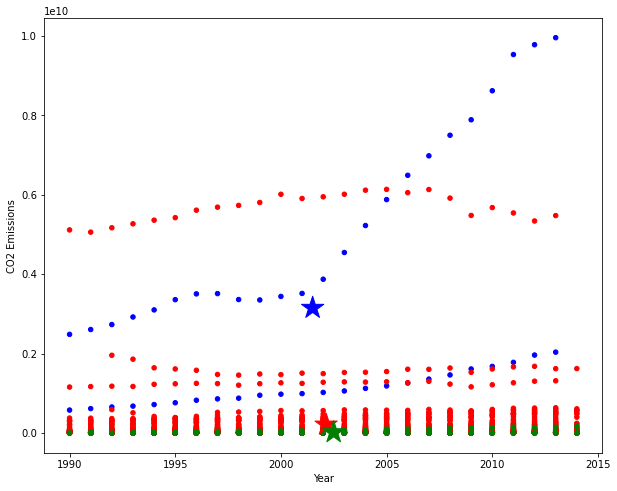

In [37]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
kahuna['color'] = kahuna['cluster'].map(lambda p: colors[p])

ax = kahuna.plot(    
    kind="scatter", 
    x="Year", y="CO2 Emissions",
    figsize=(10,8),
    c = kahuna['color']
)

centroids.plot(
    kind="scatter", 
    x="Year", y="CO2 Emissions",
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

In [38]:
scores = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [39]:
score_df.head()

,k,inertia,silhouette
0,2,318348.095068,0.380625
1,3,309279.017783,0.037876
2,4,303302.956290,0.039285
3,5,298185.607021,0.040007
4,6,293726.427130,0.052660


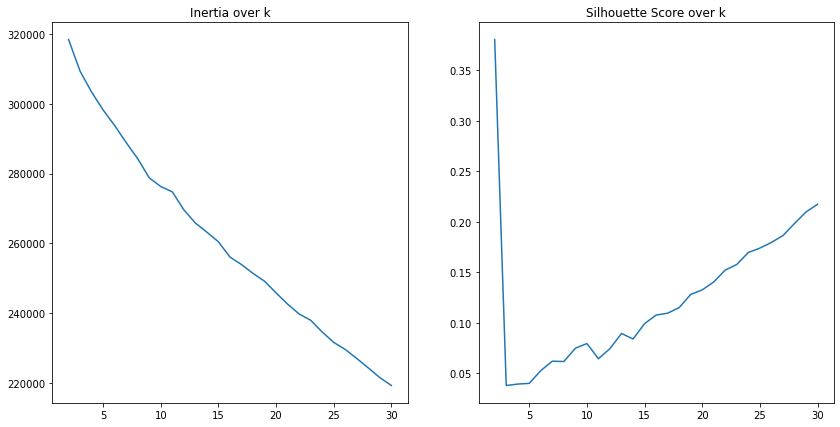

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k');

C:\Users\saraz\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


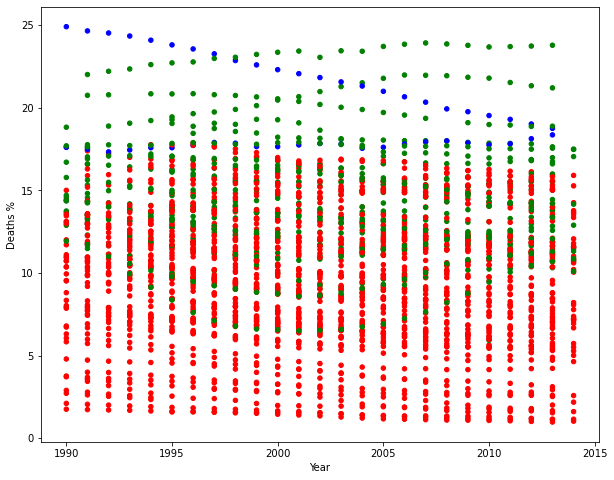

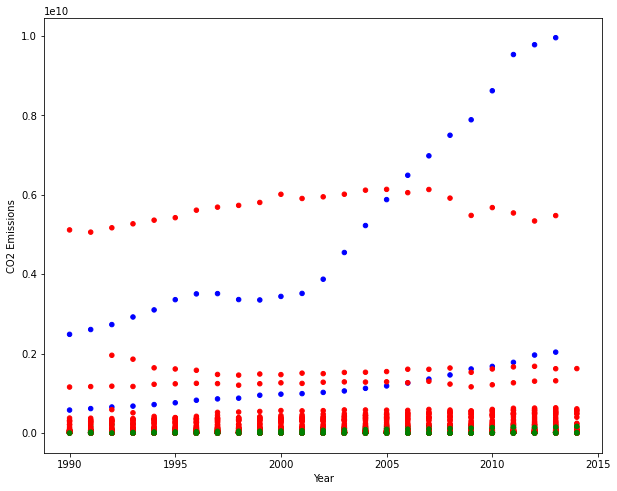

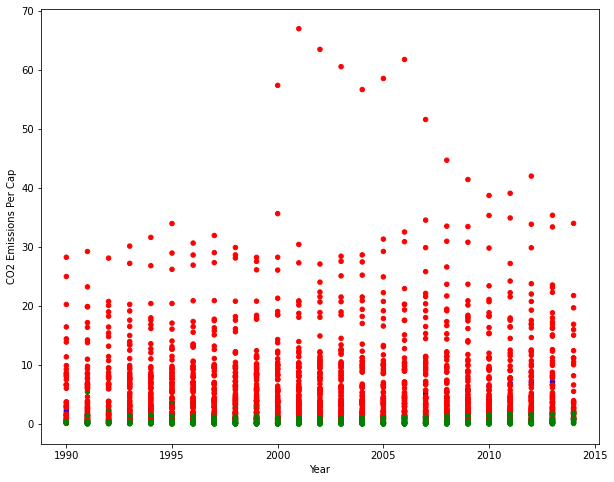

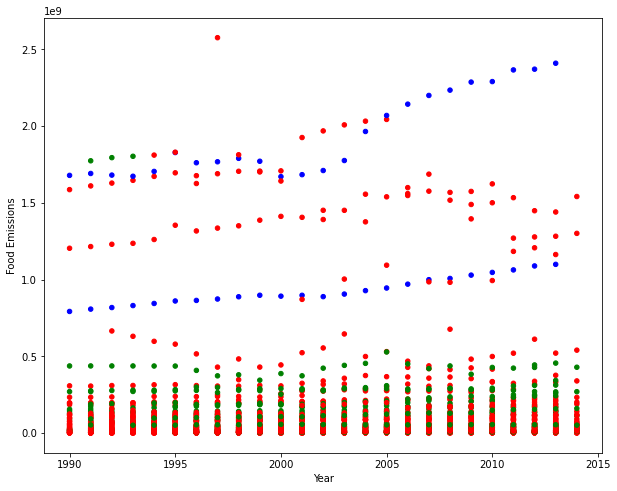

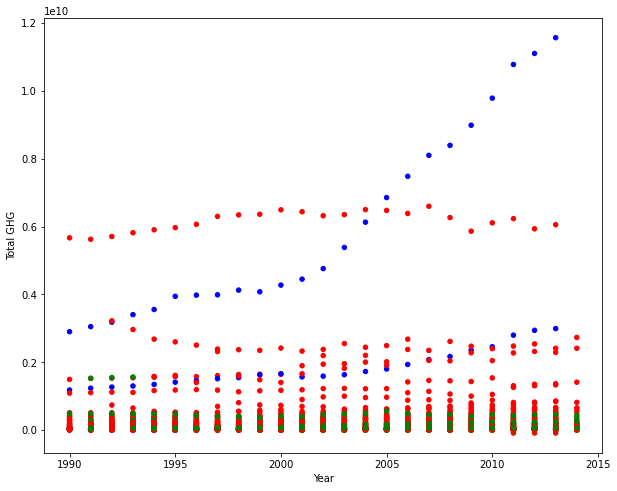

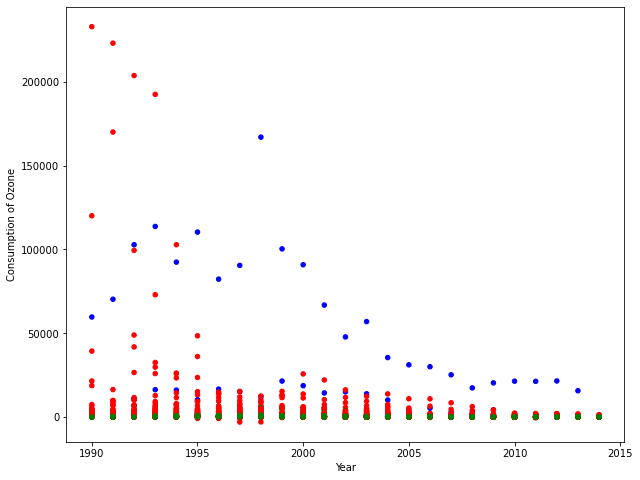

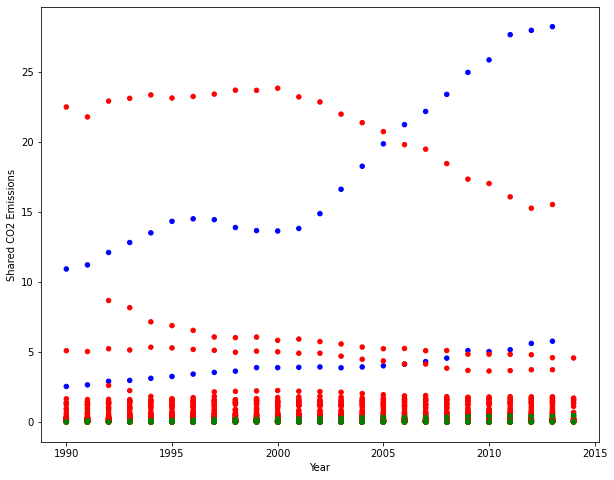

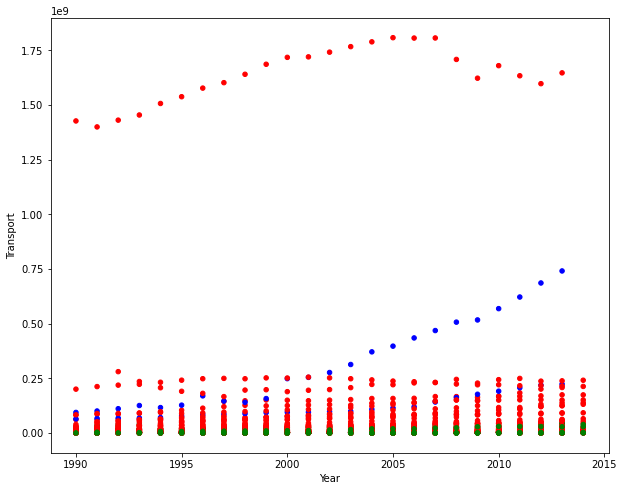

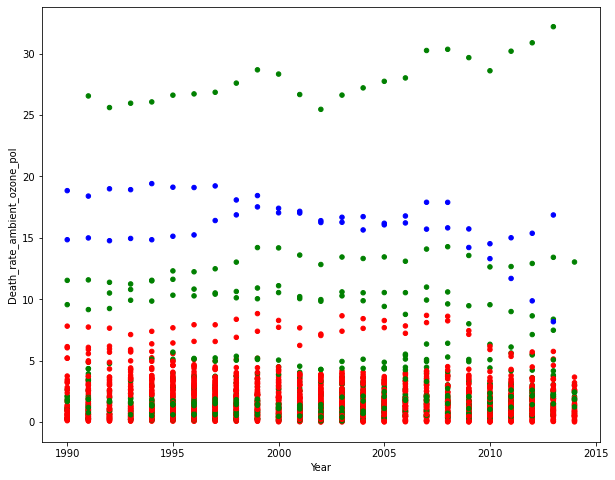

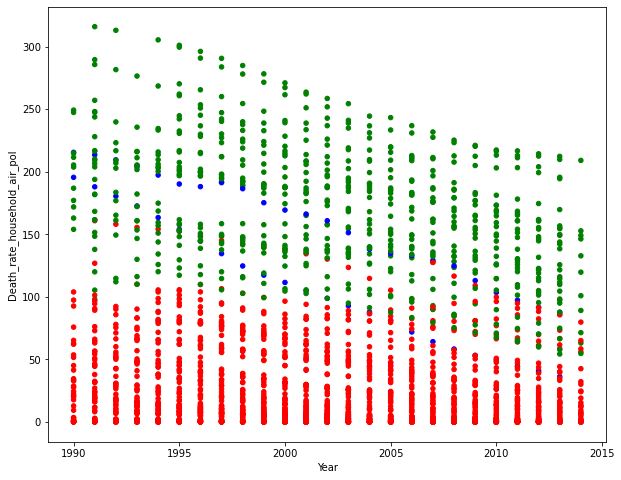

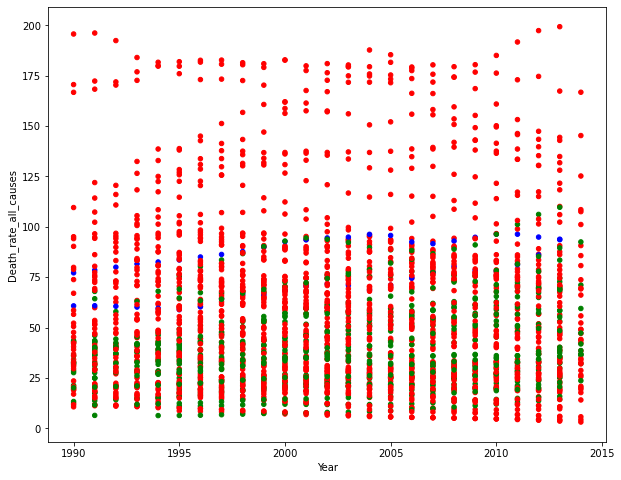

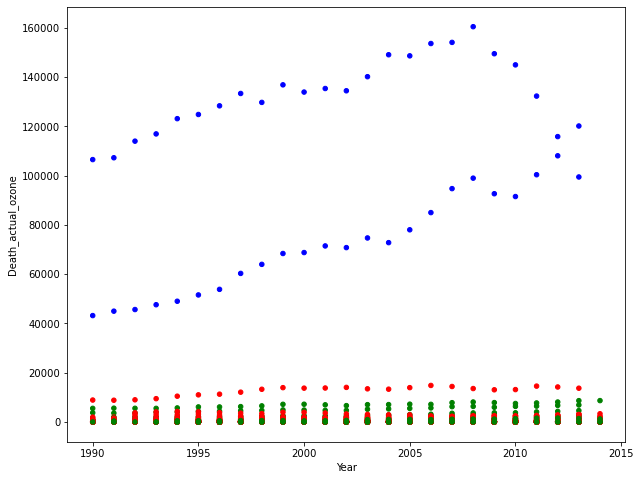

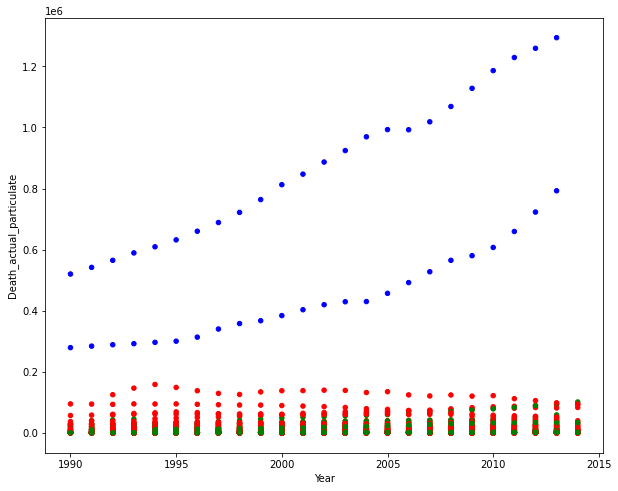

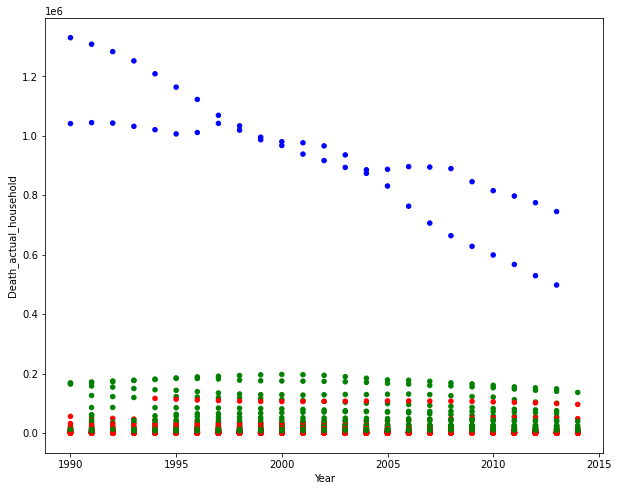

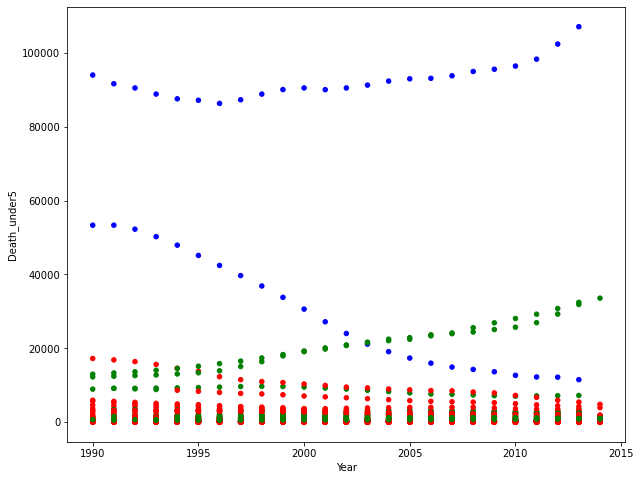

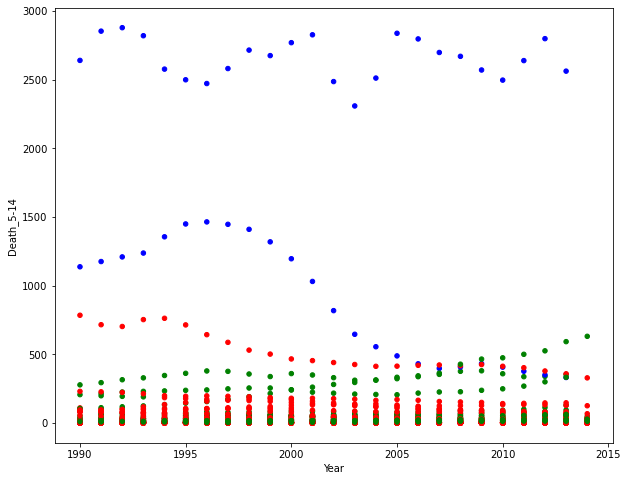

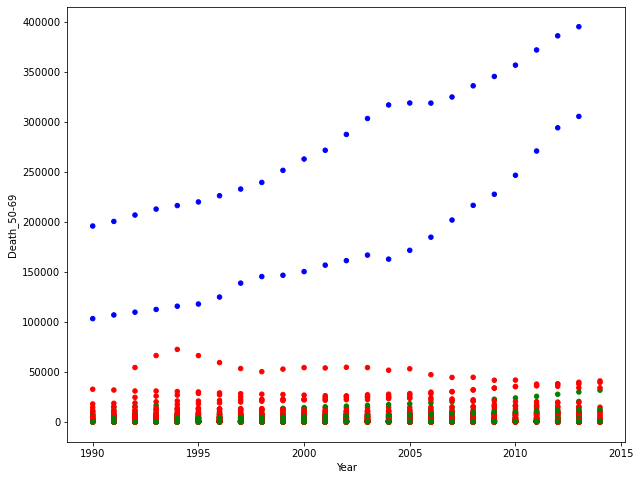

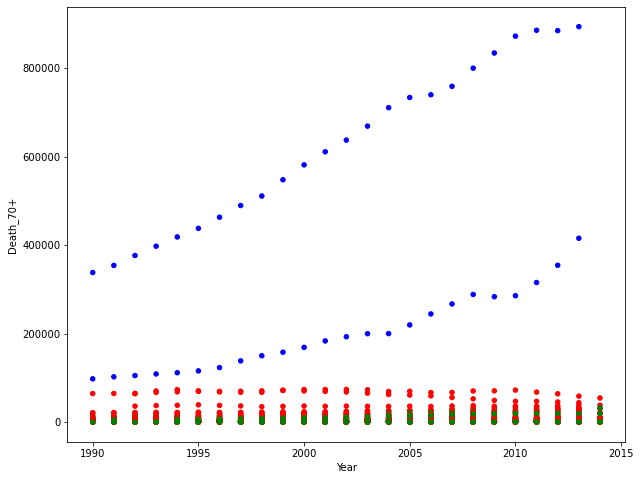

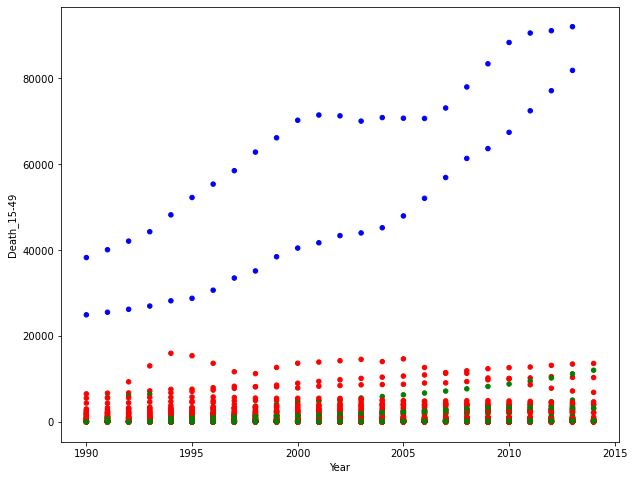

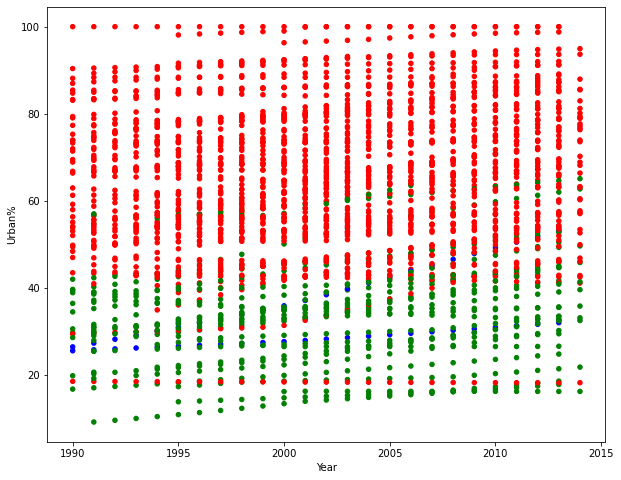

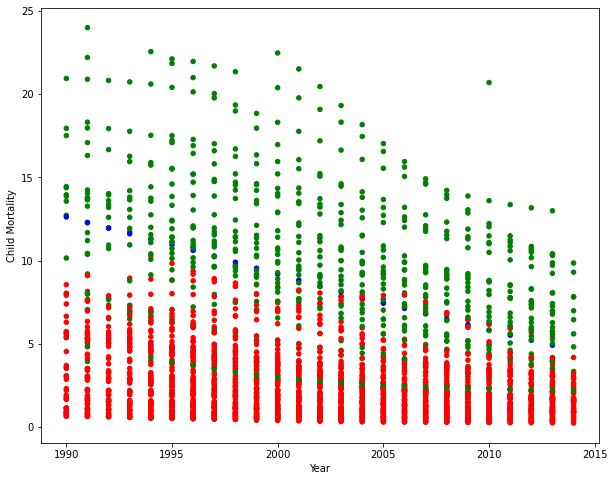

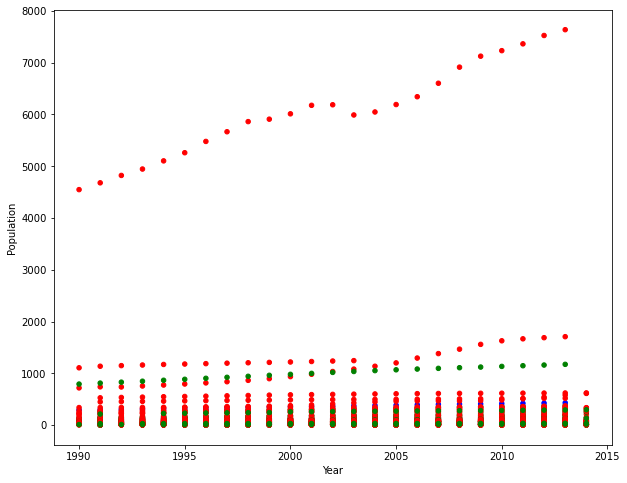

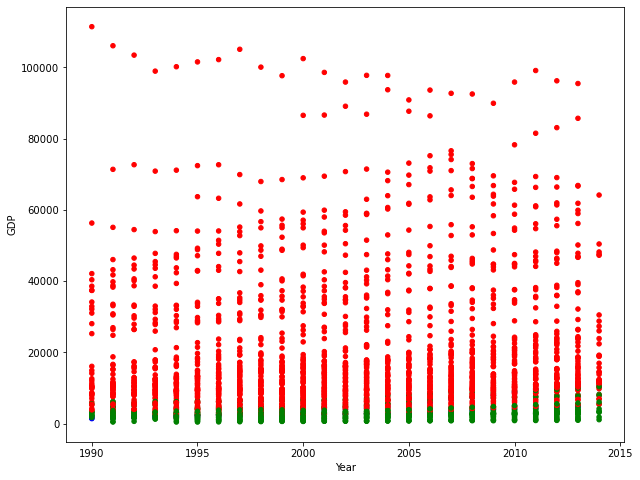

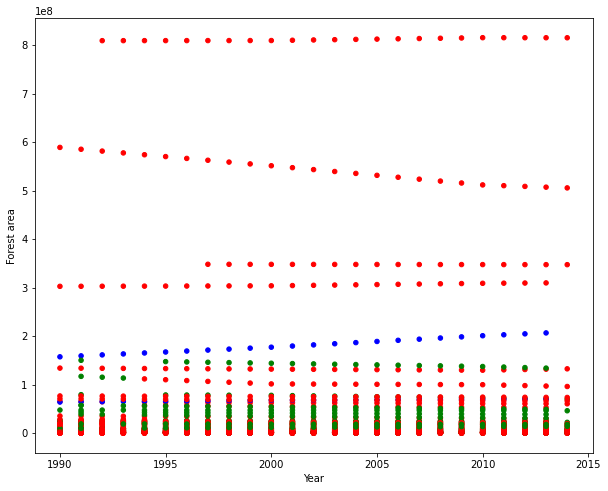

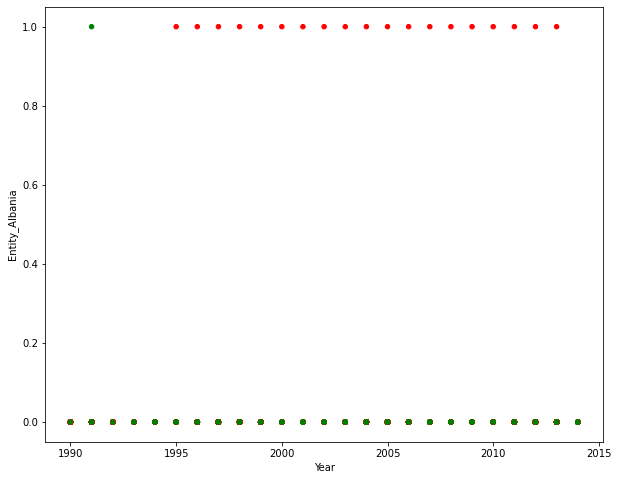

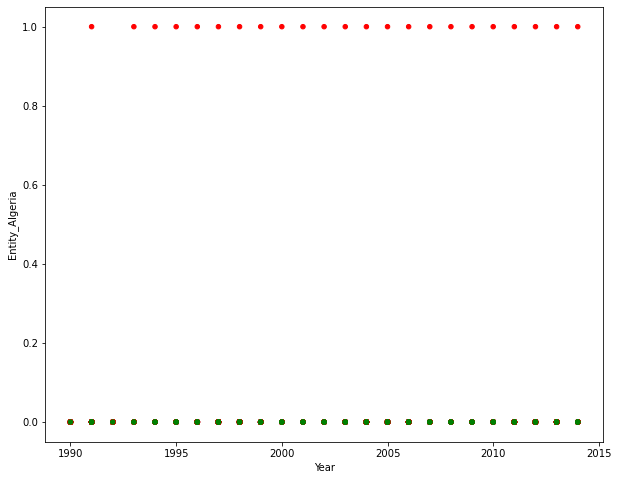

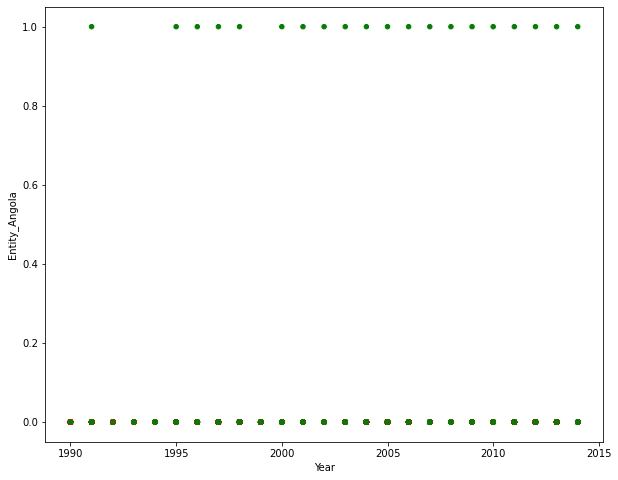

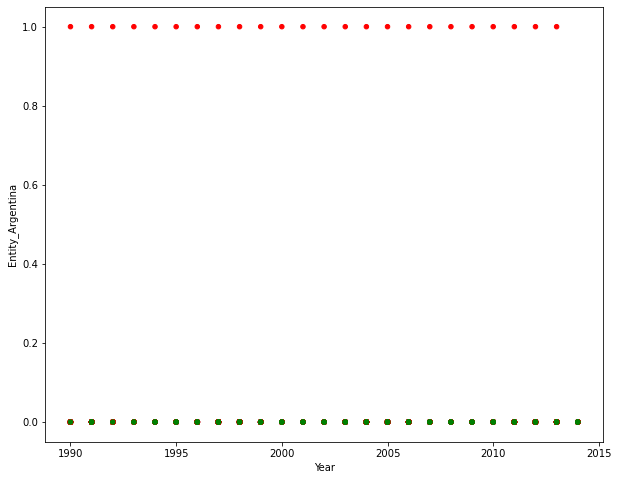

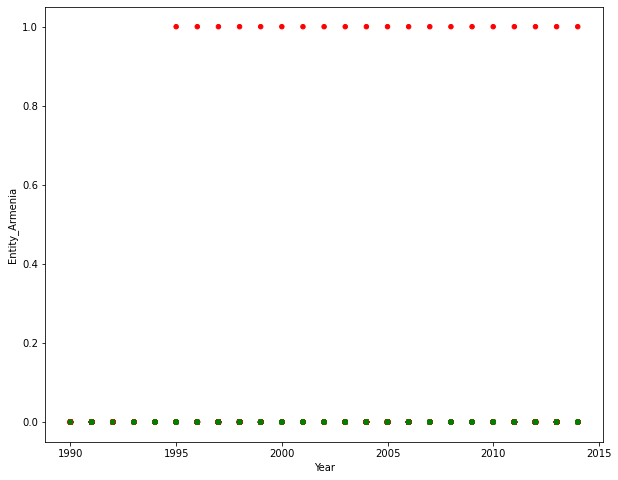

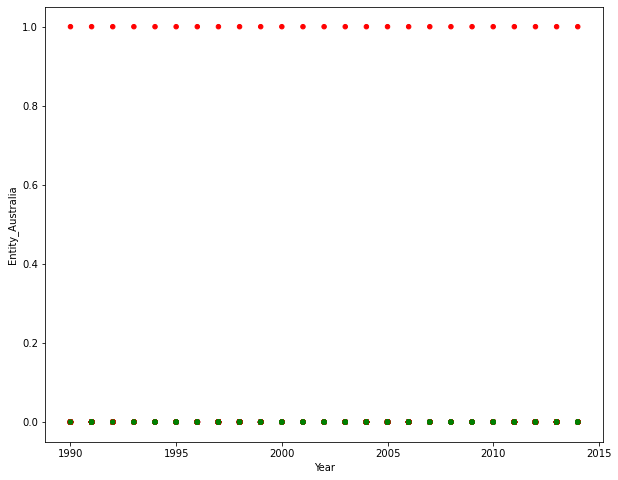

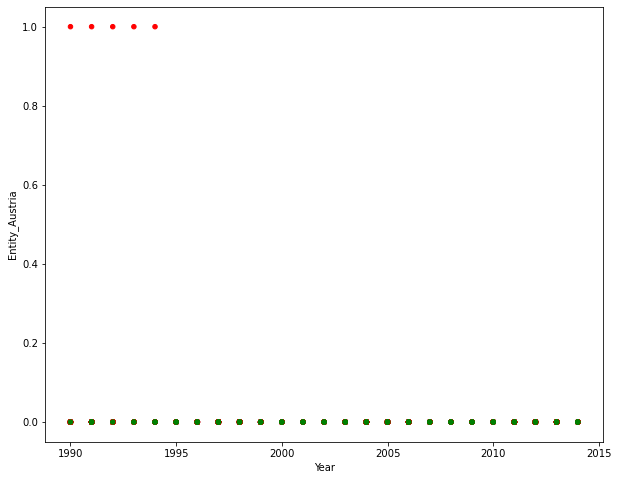

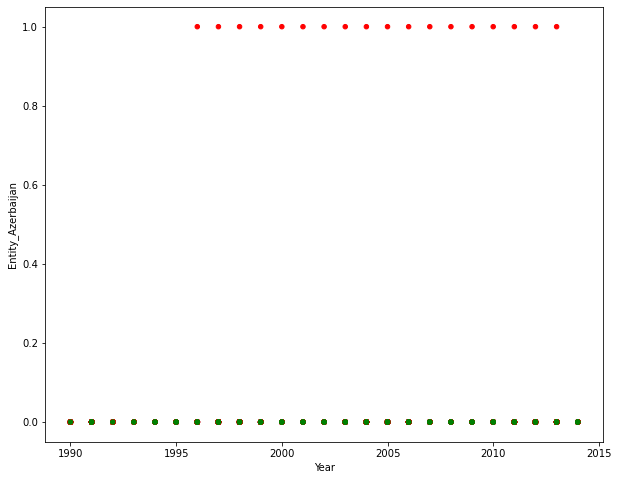

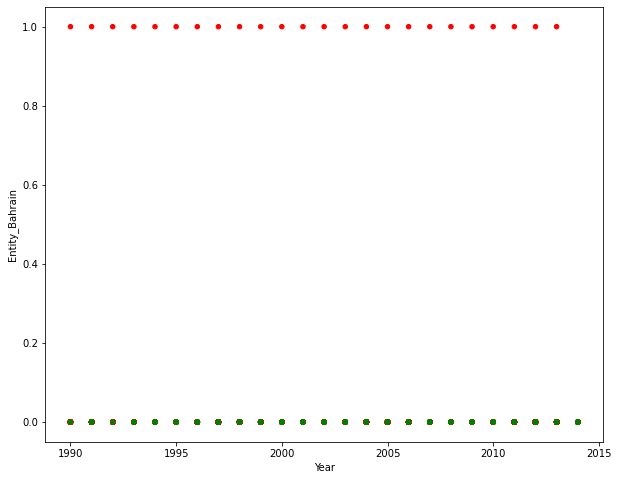

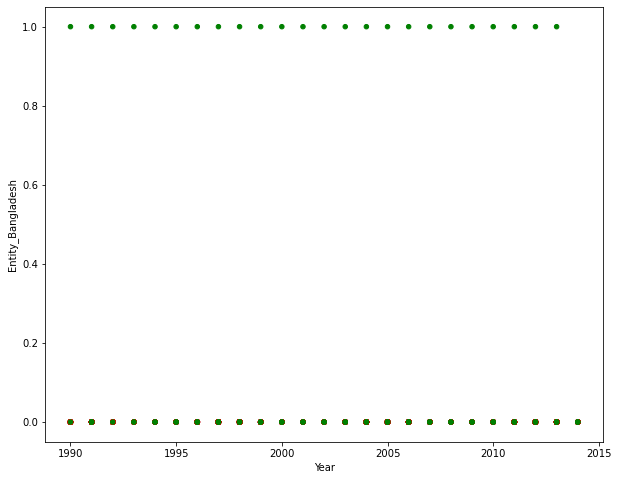

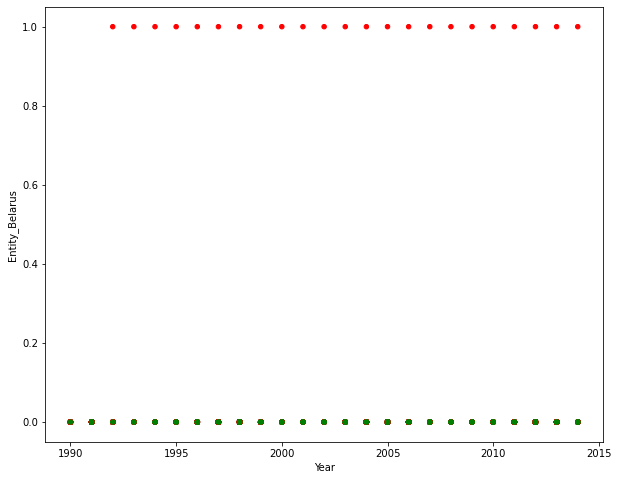

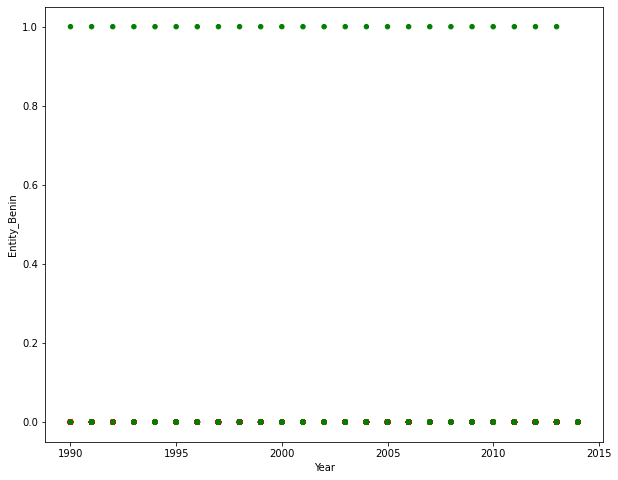

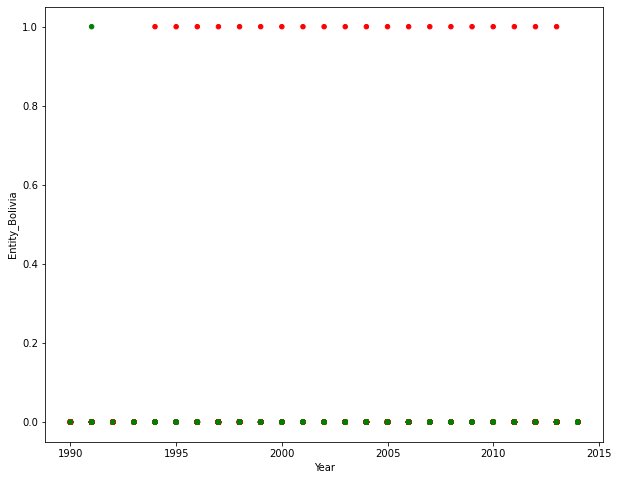

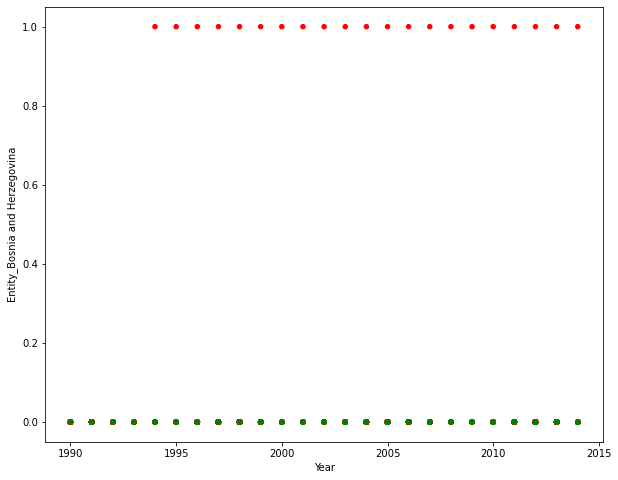

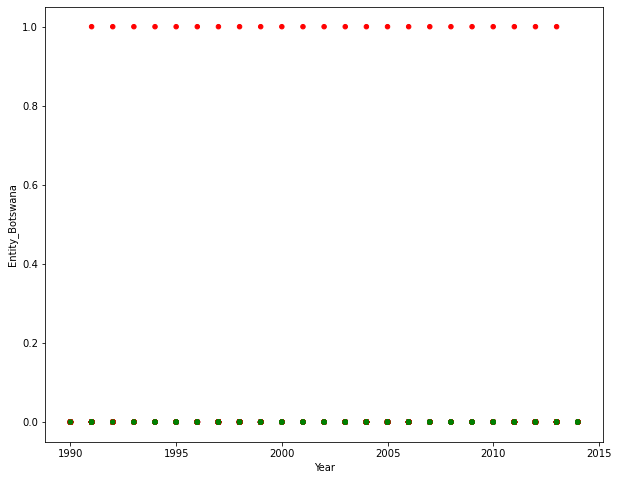

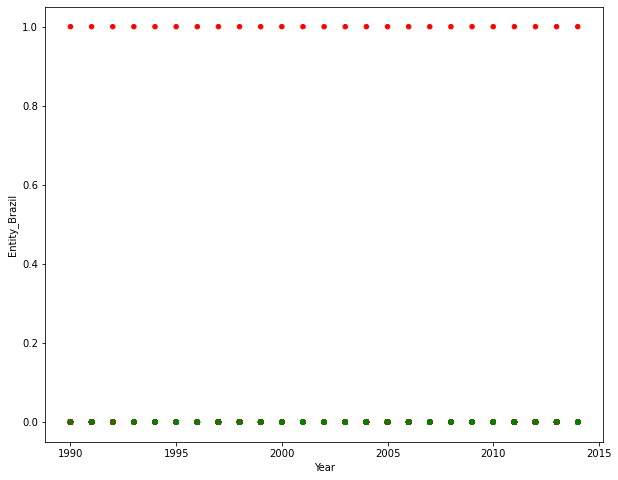

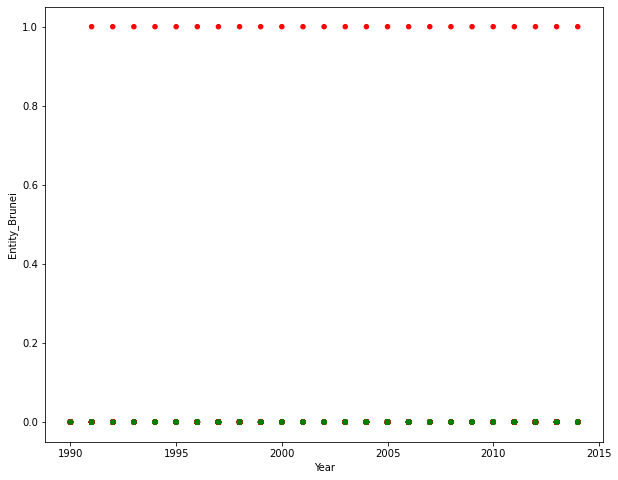

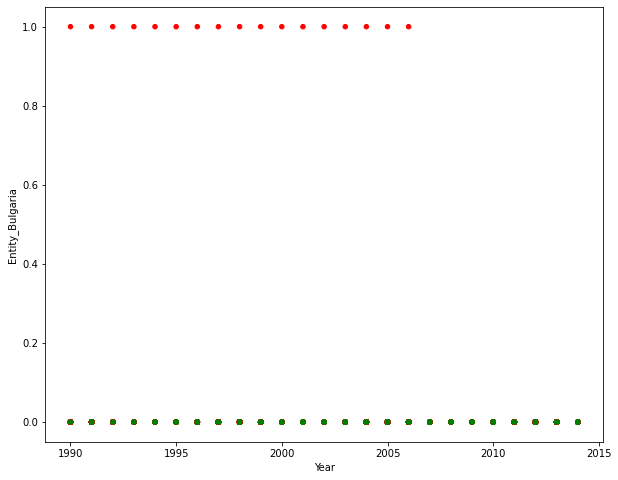

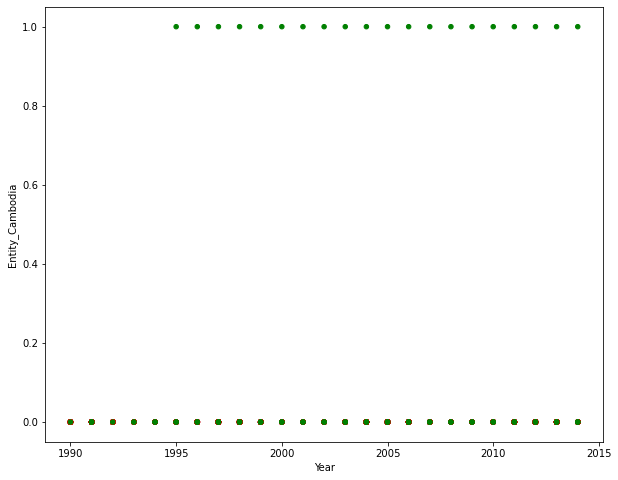

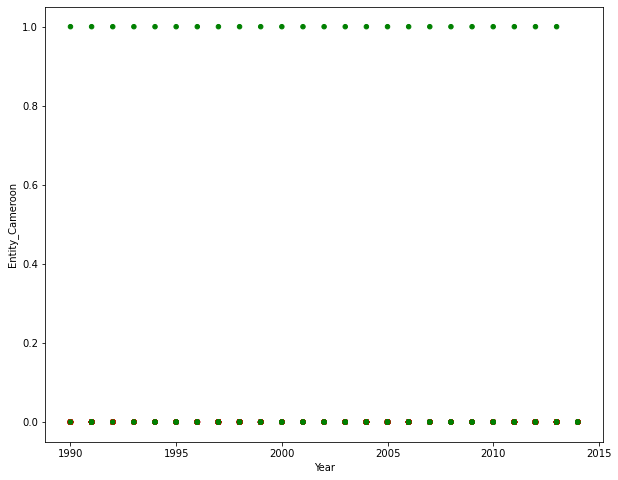

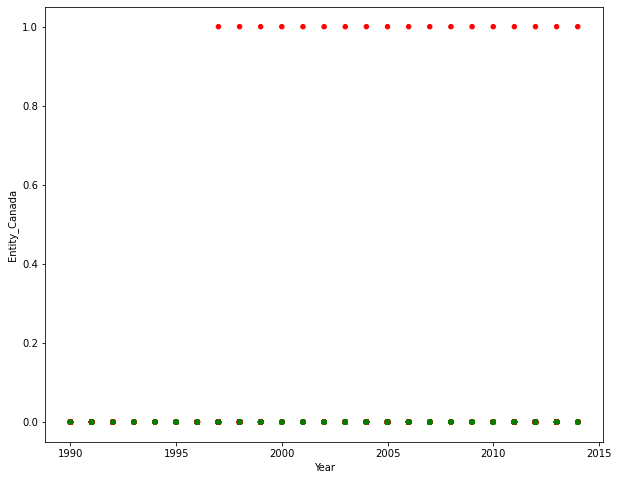

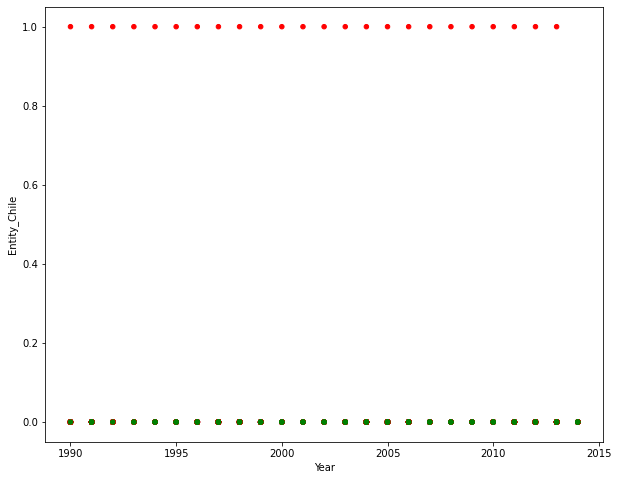

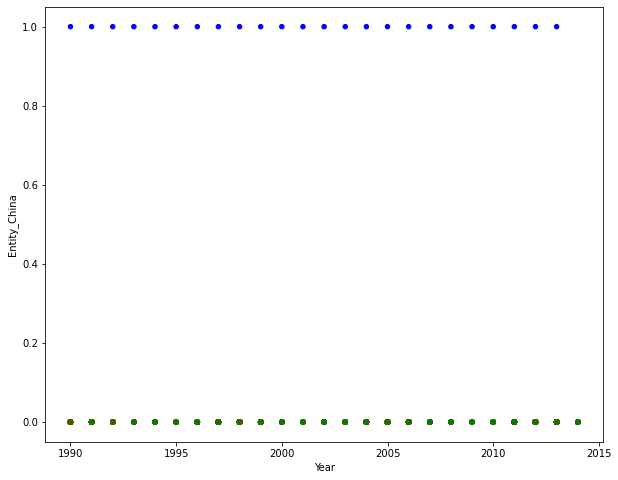

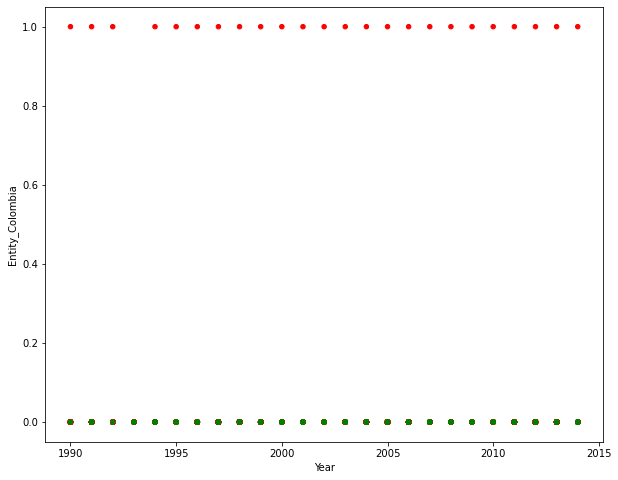

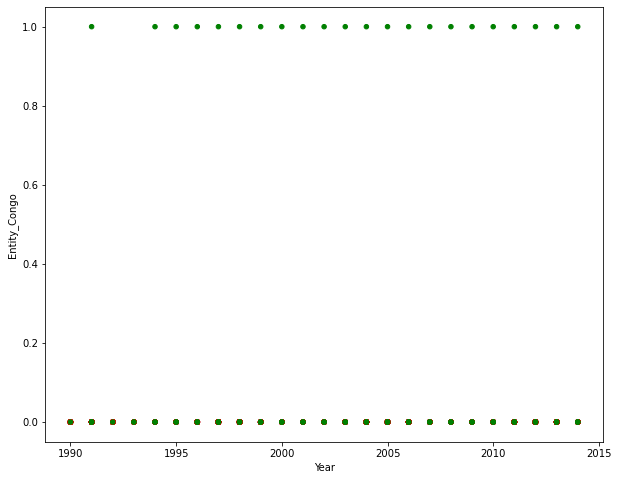

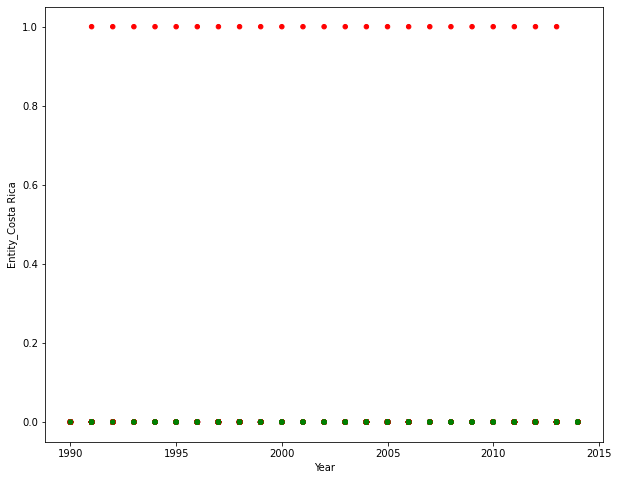

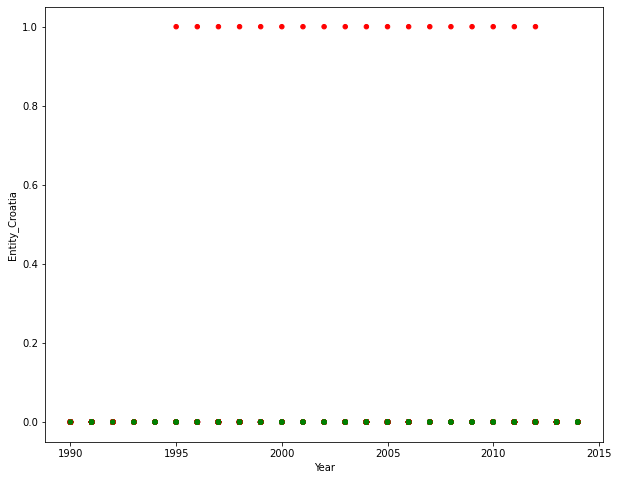

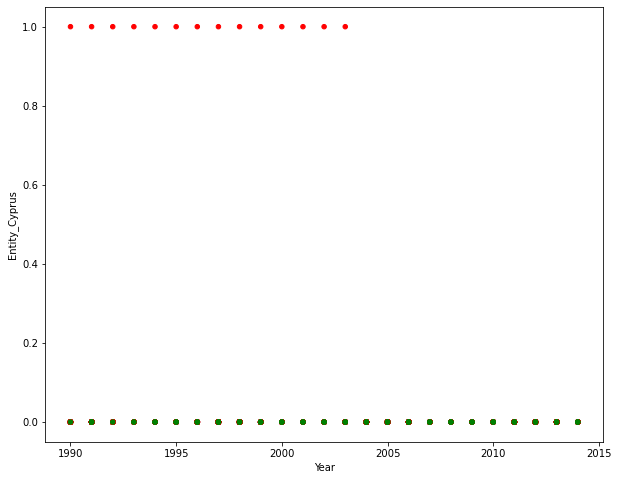

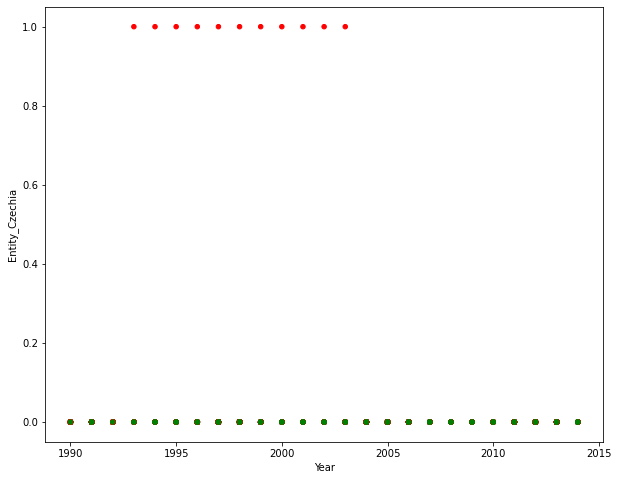

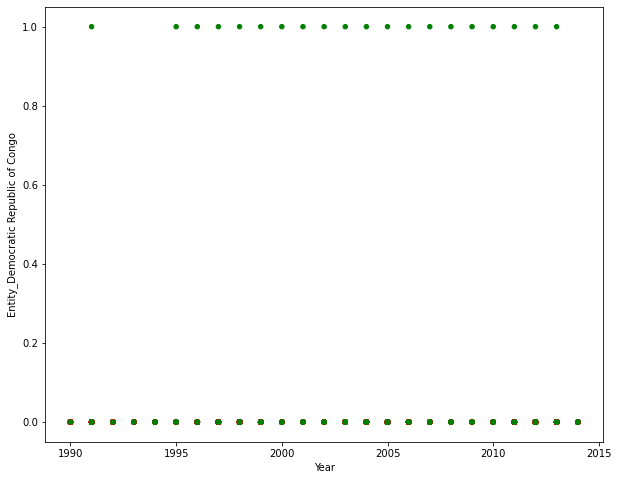

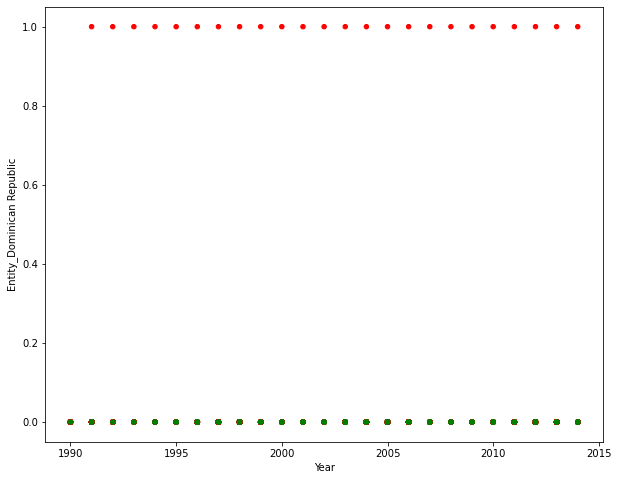

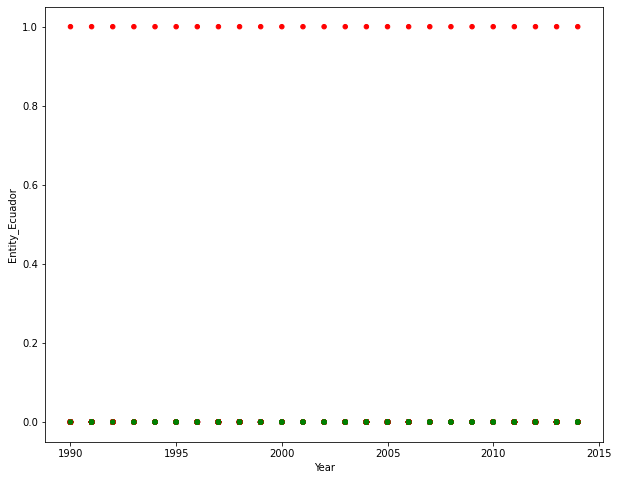

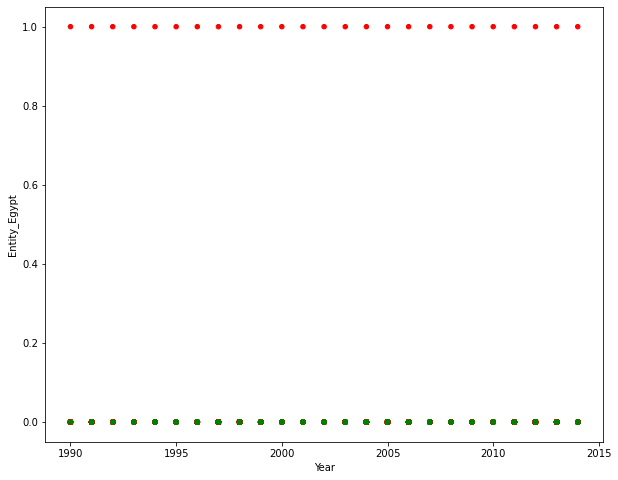

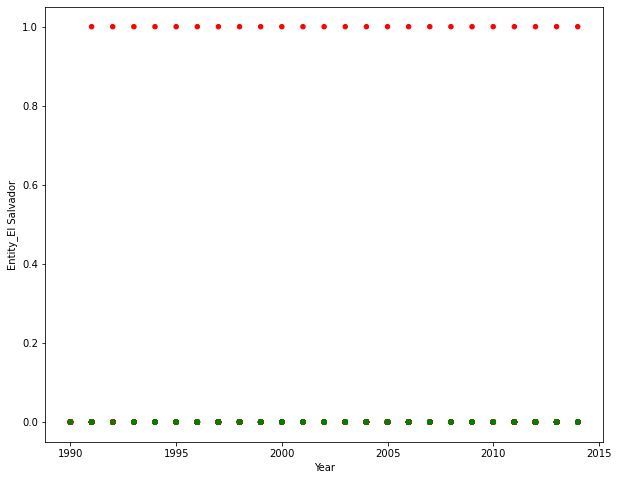

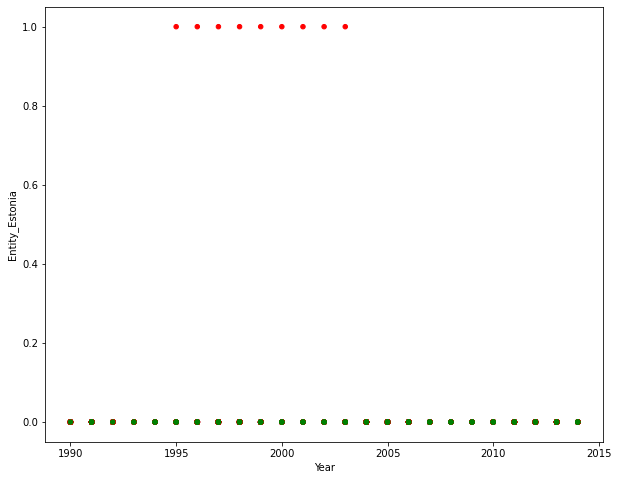

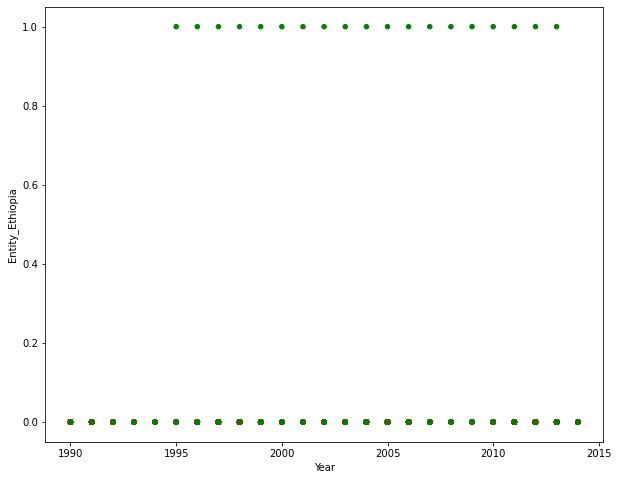

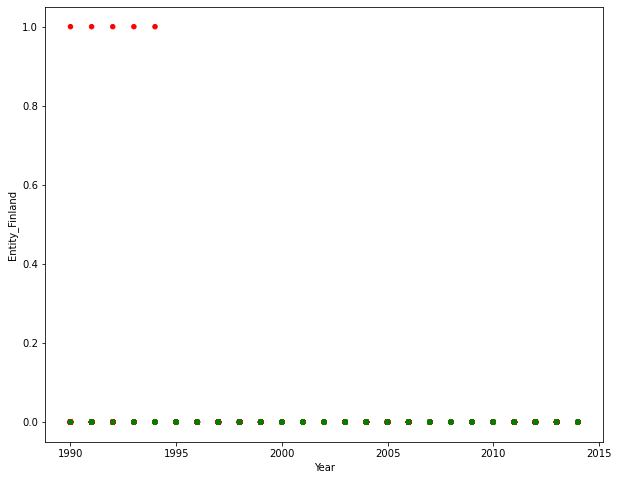

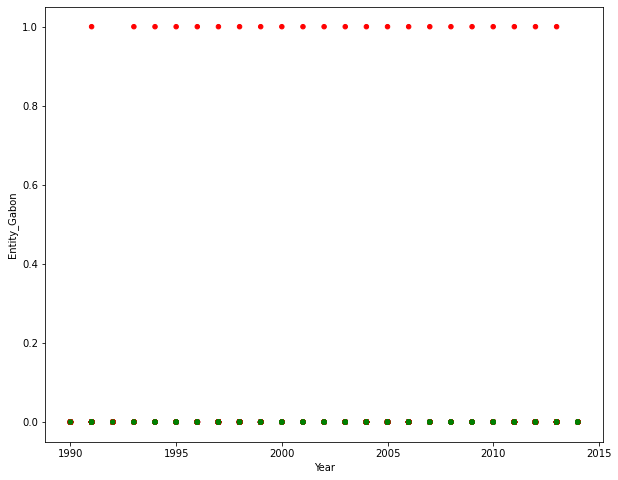

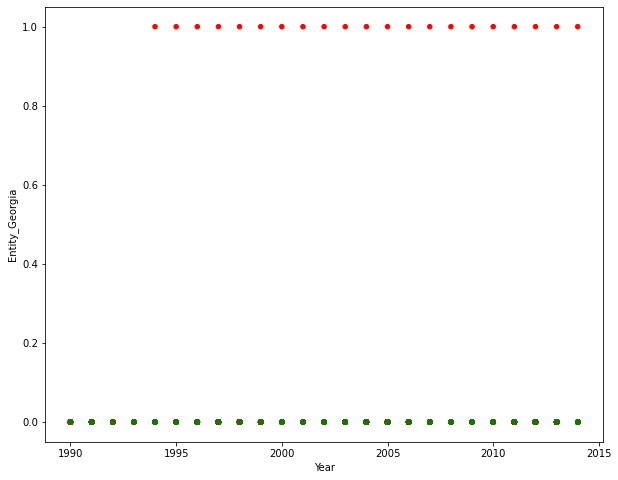

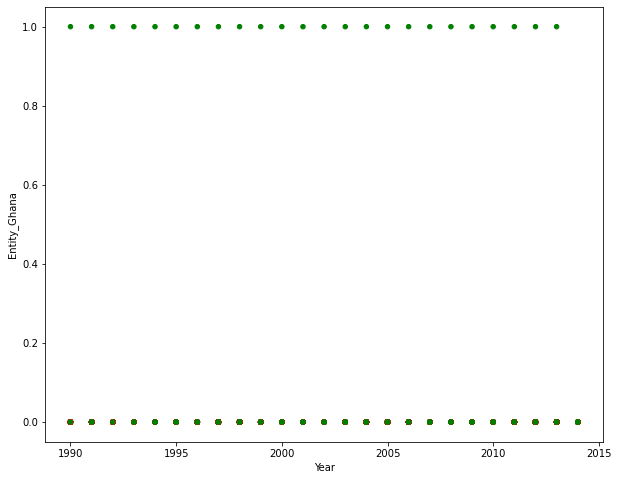

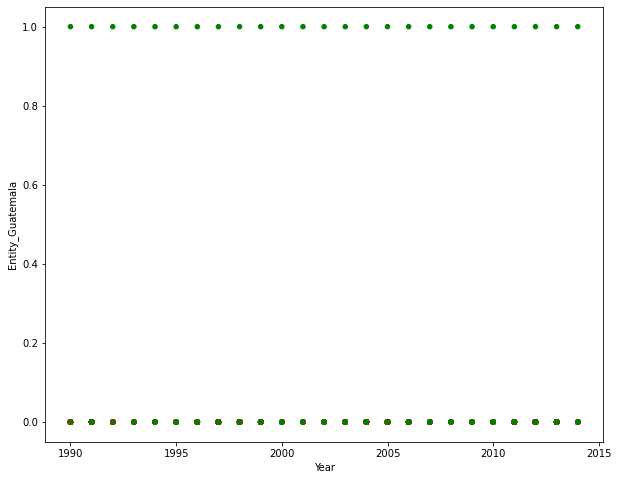

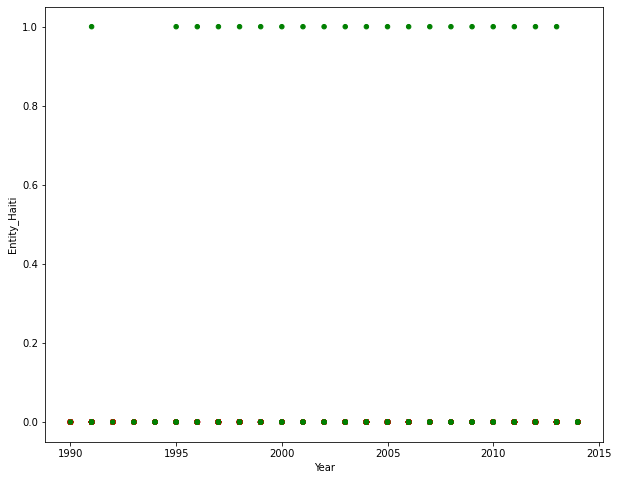

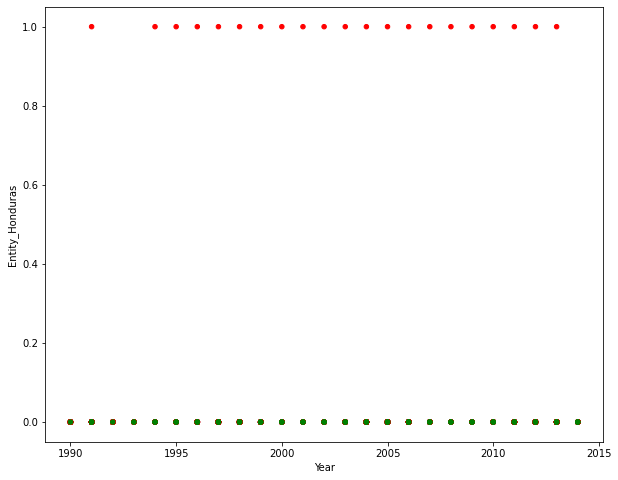

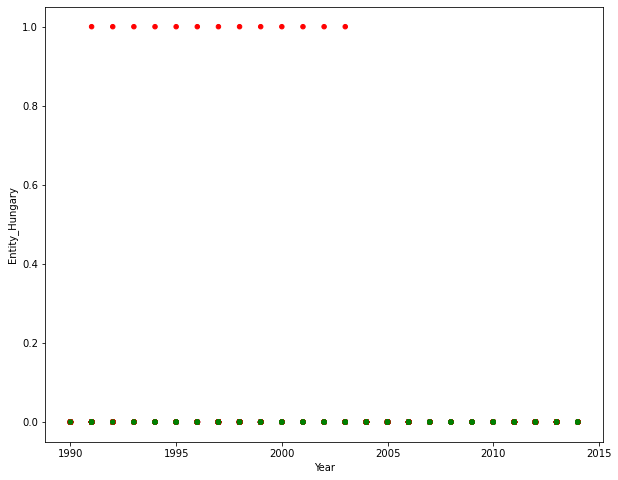

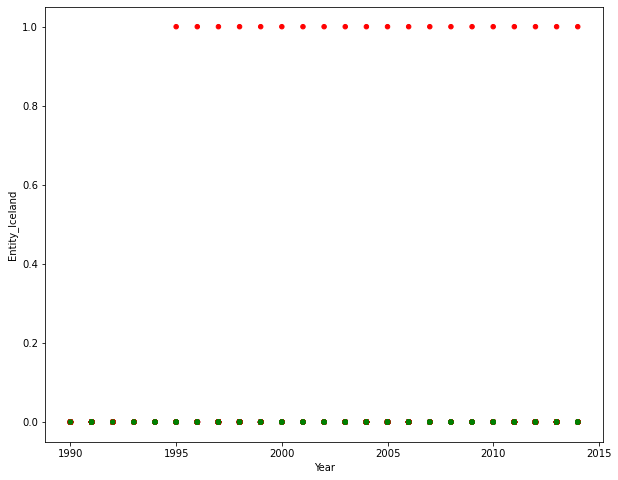

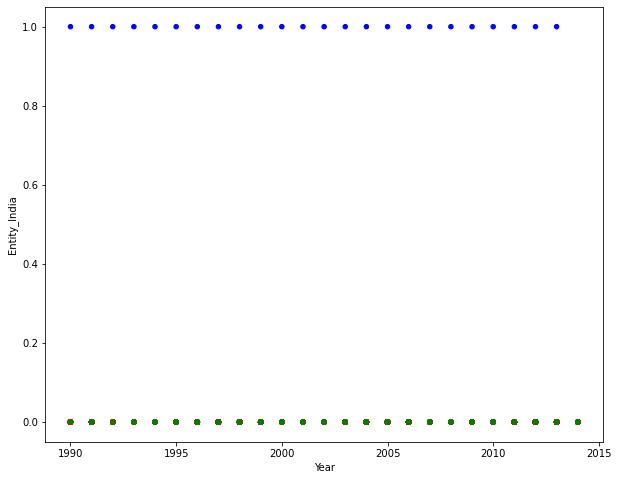

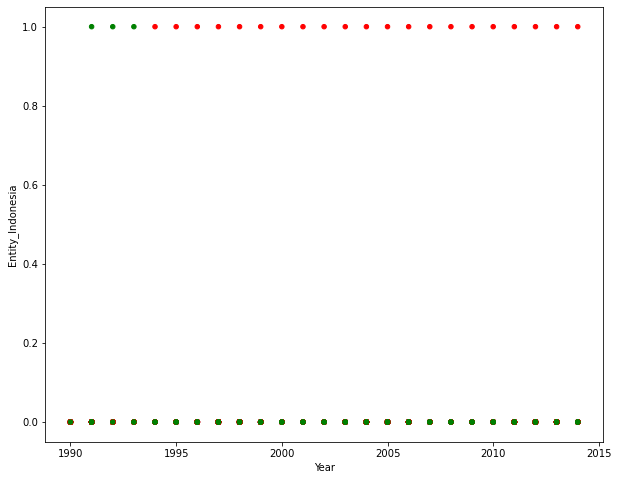

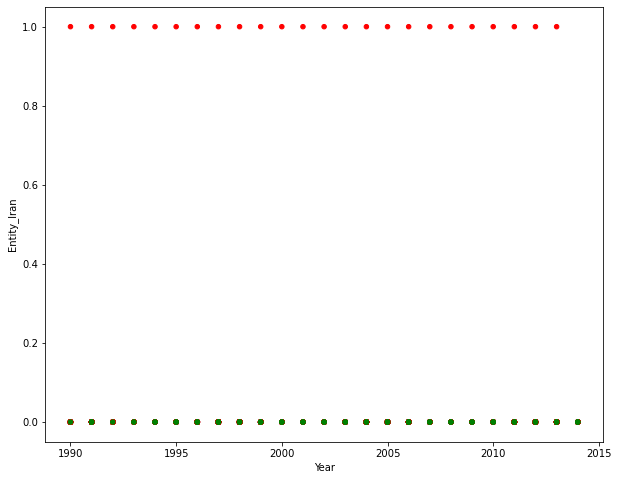

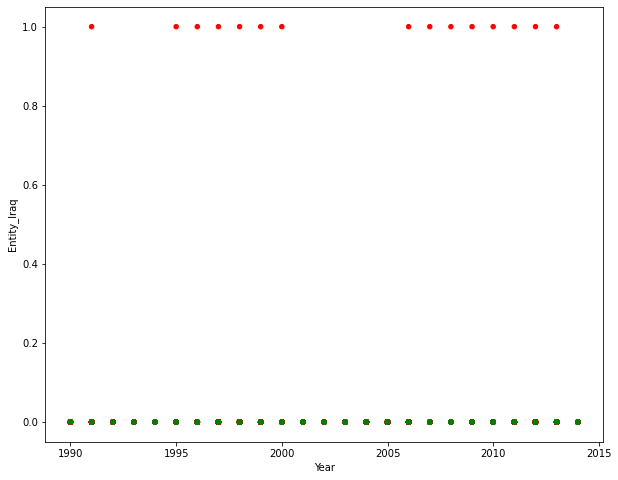

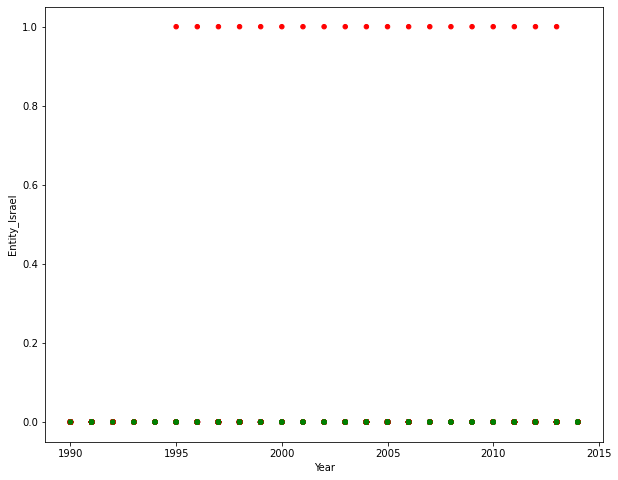

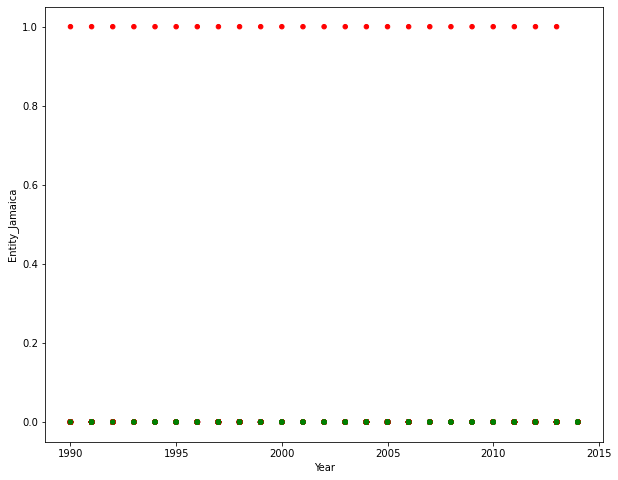

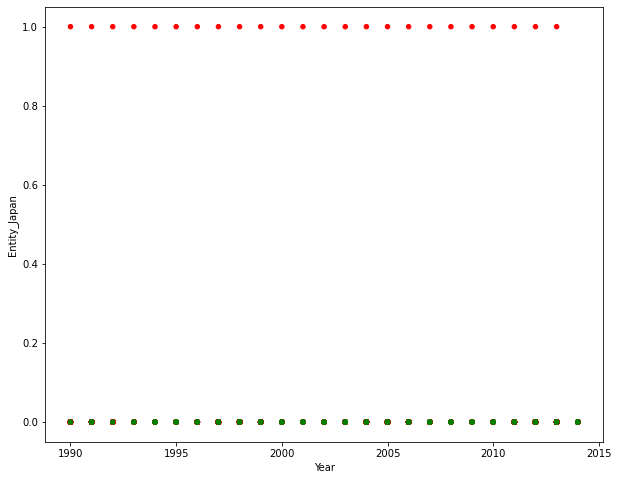

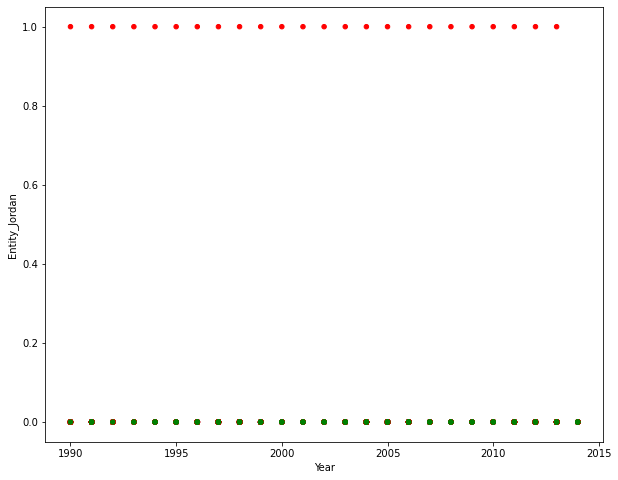

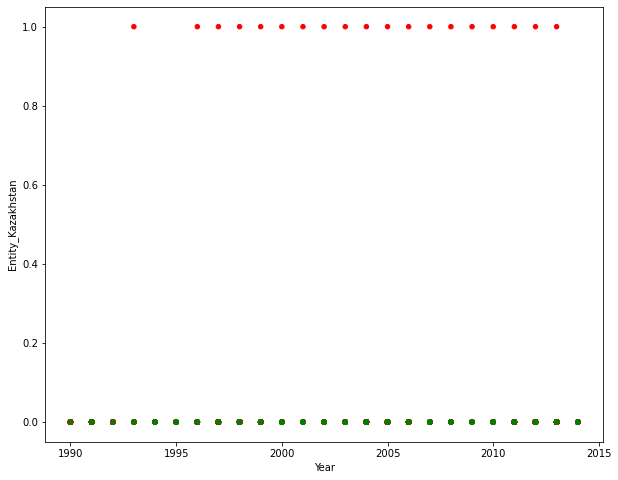

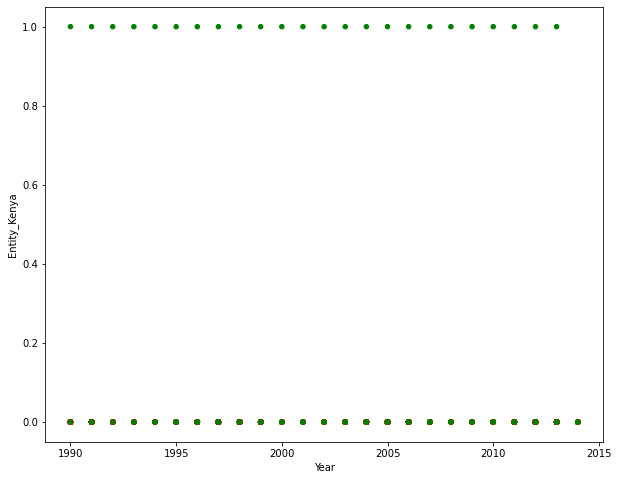

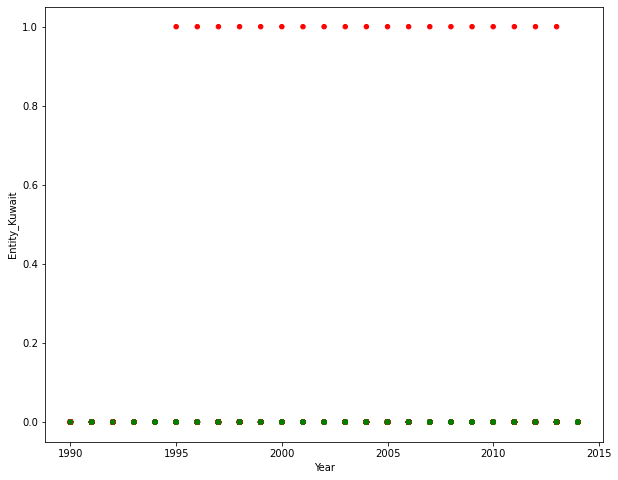

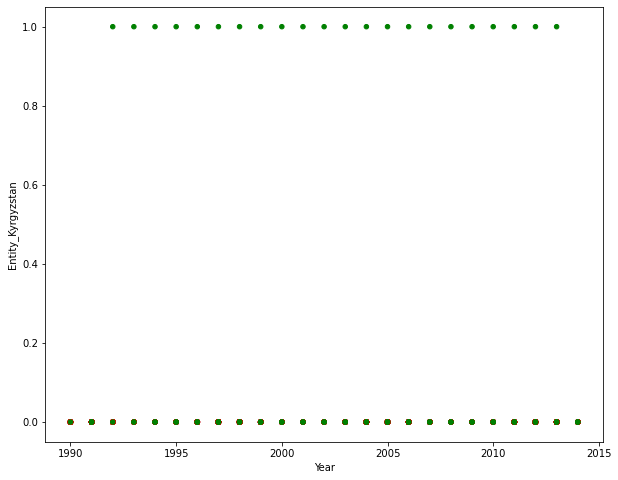

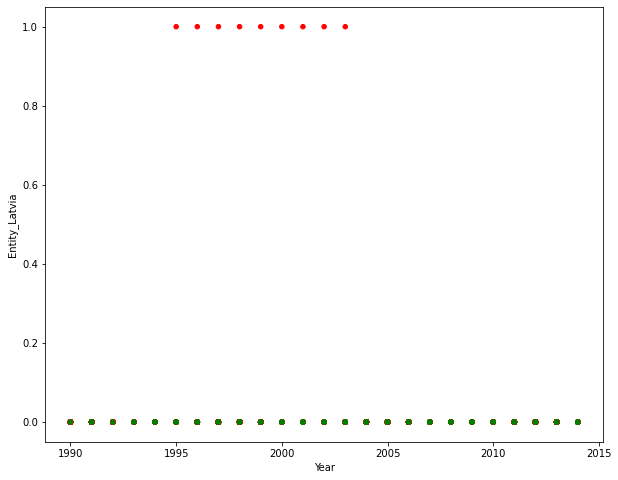

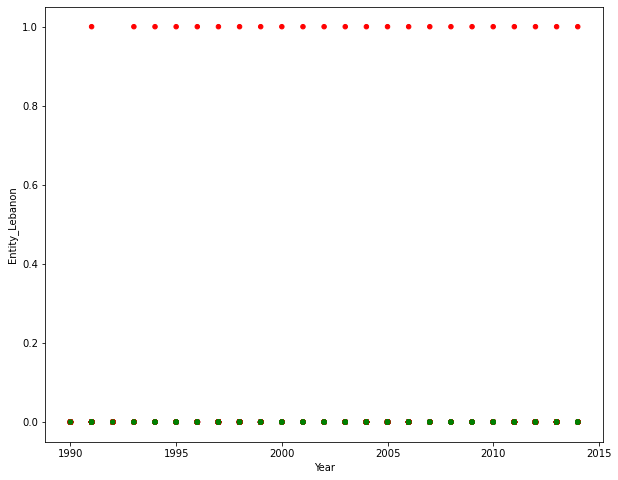

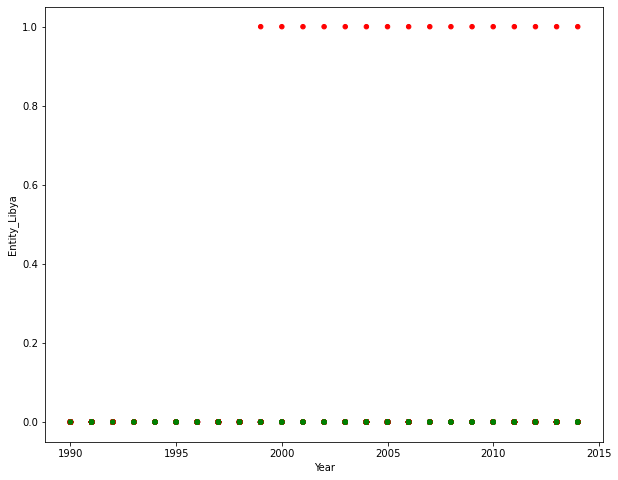

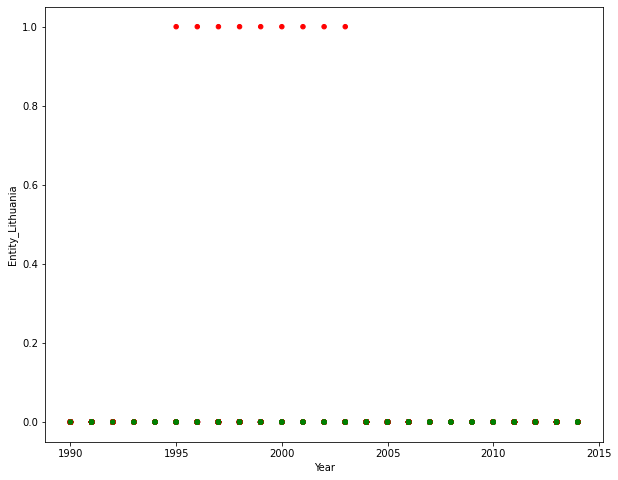

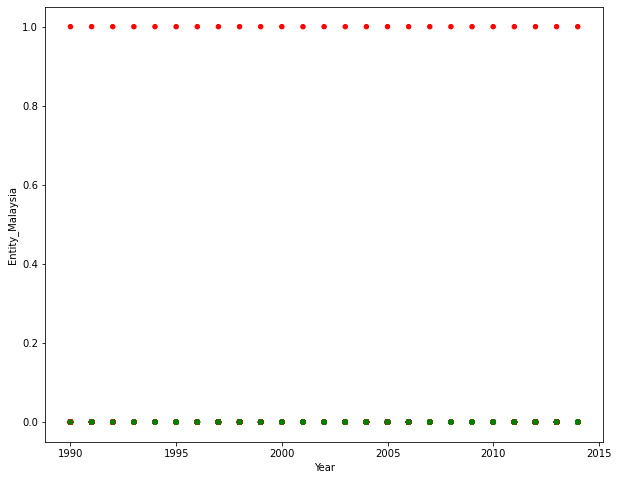

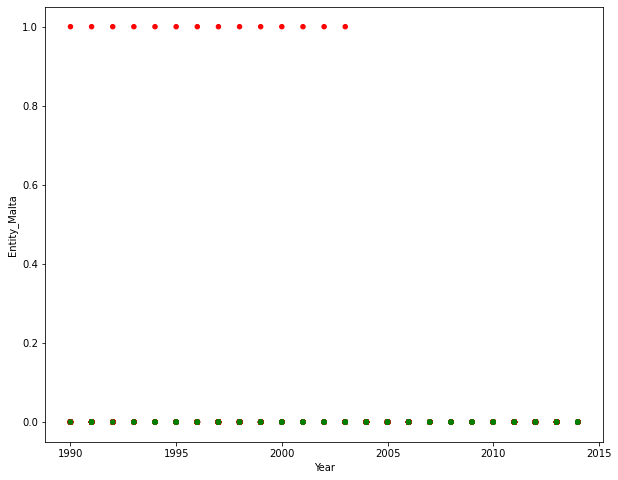

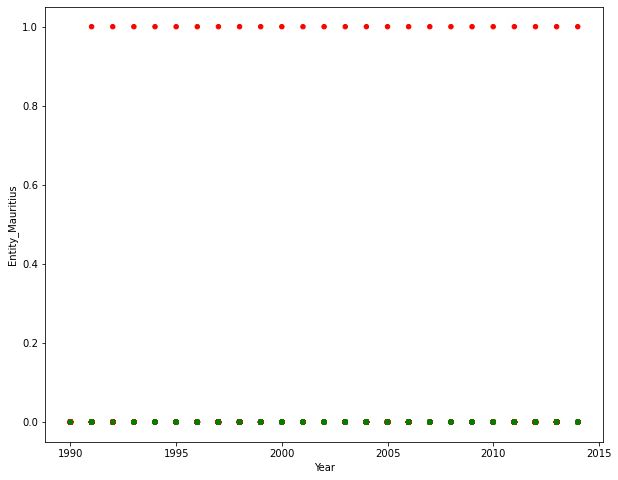

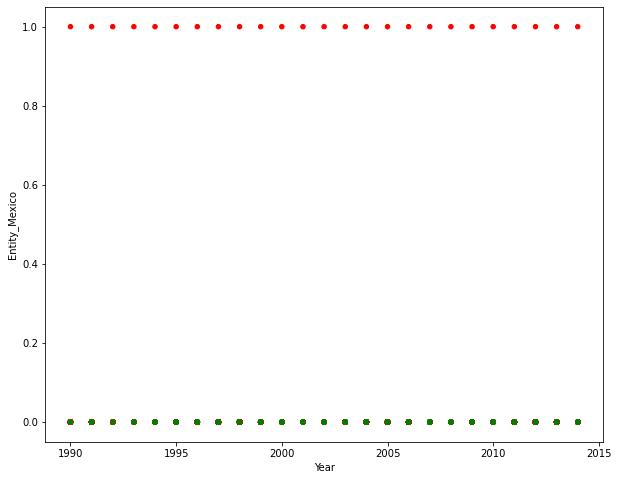

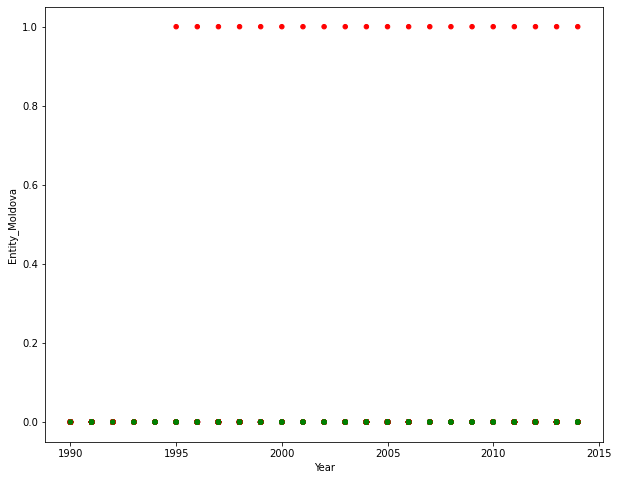

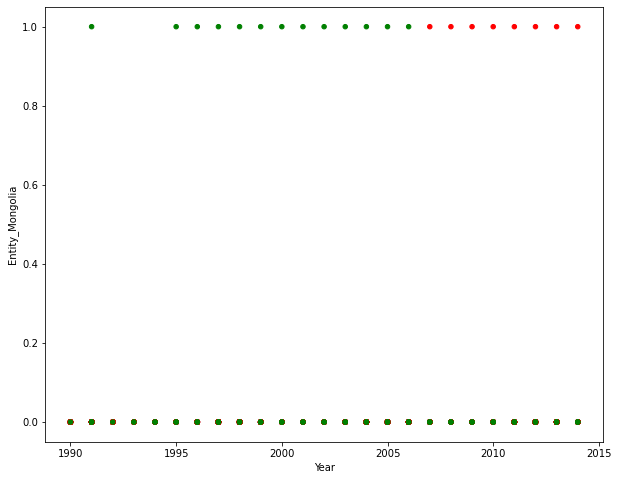

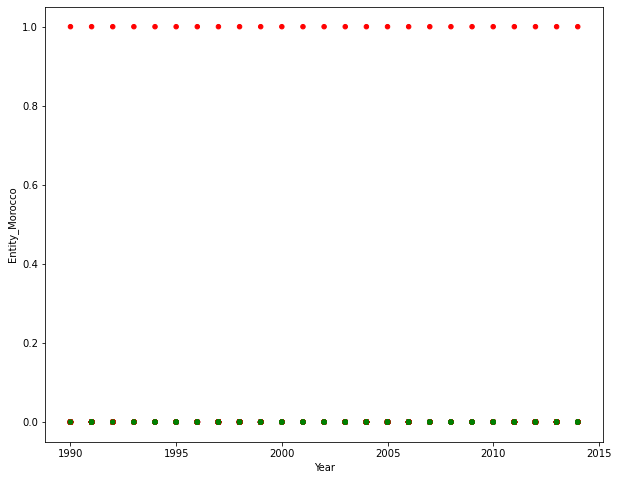

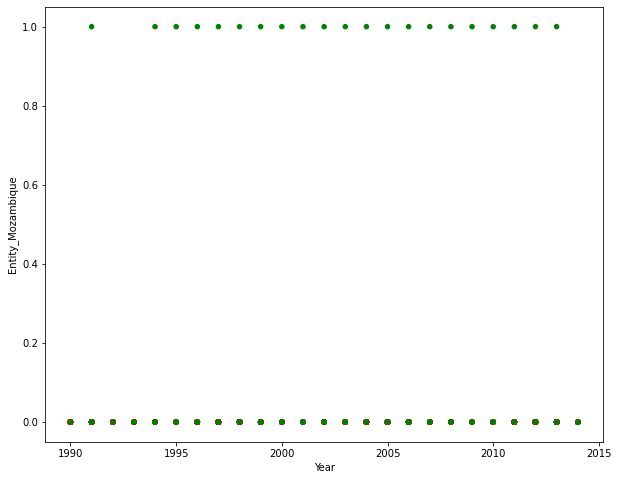

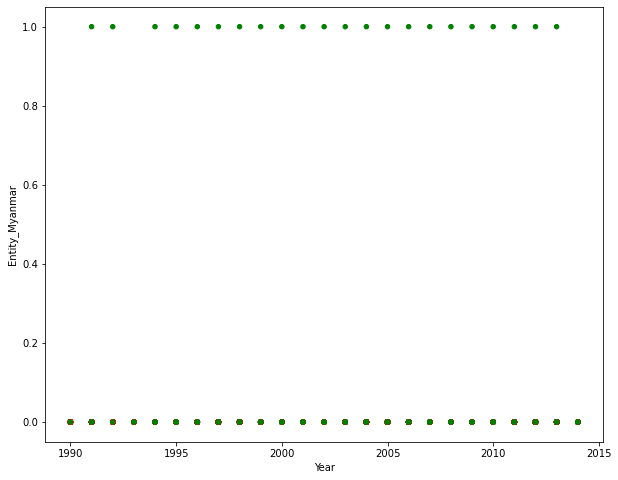

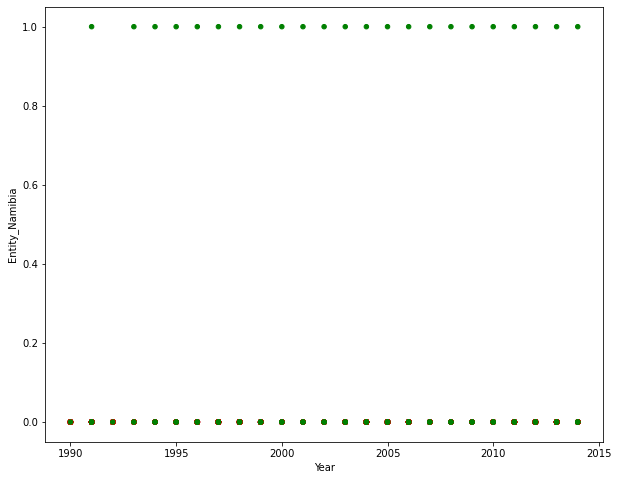

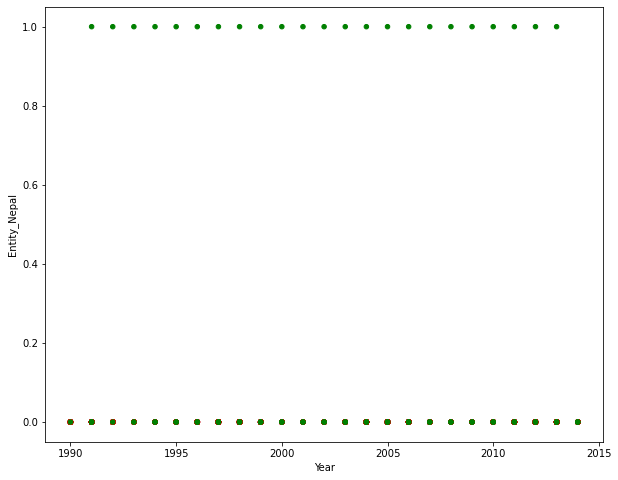

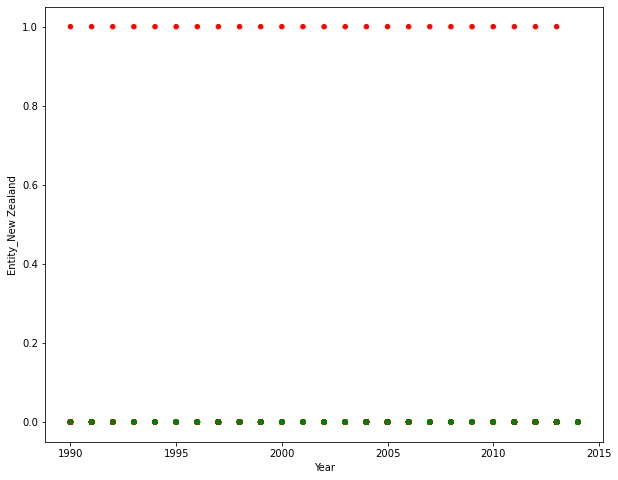

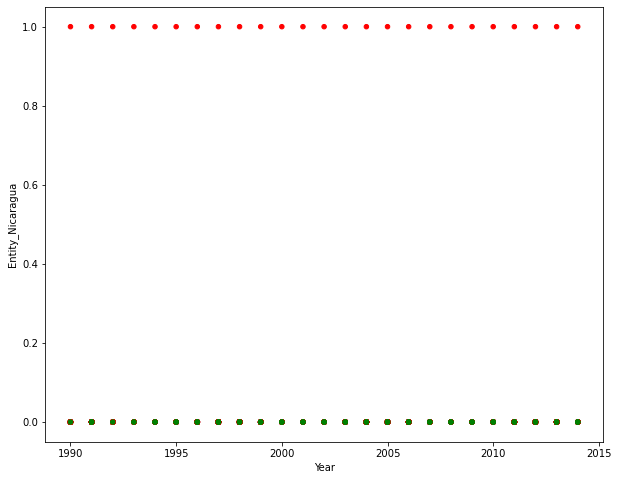

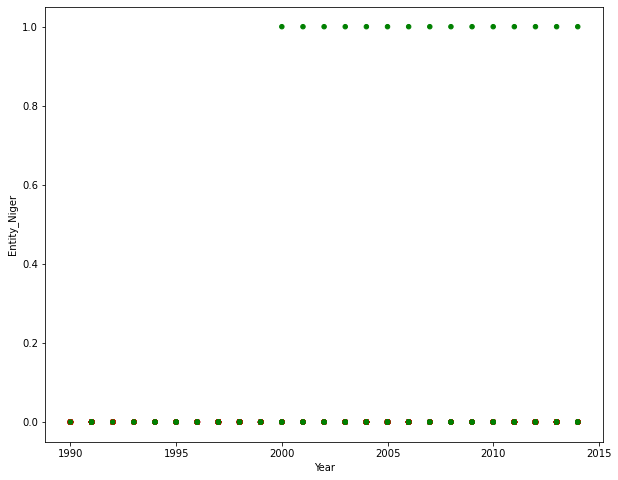

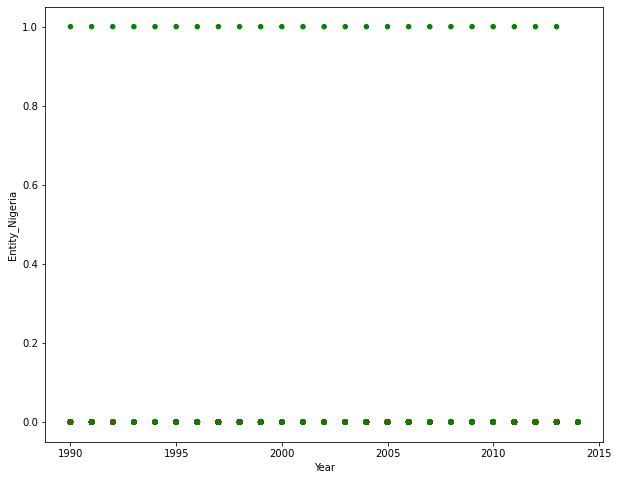

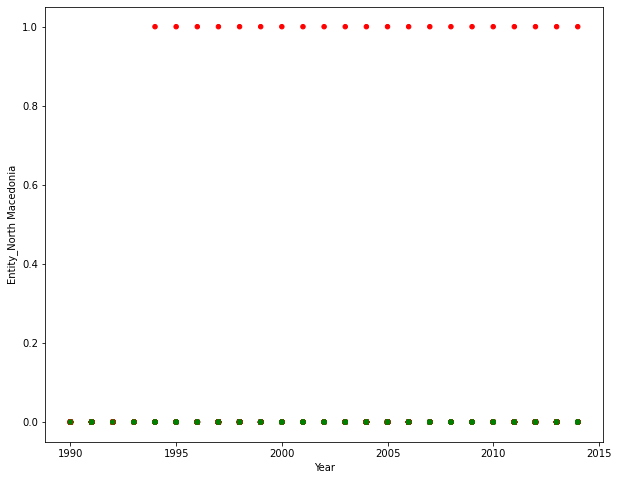

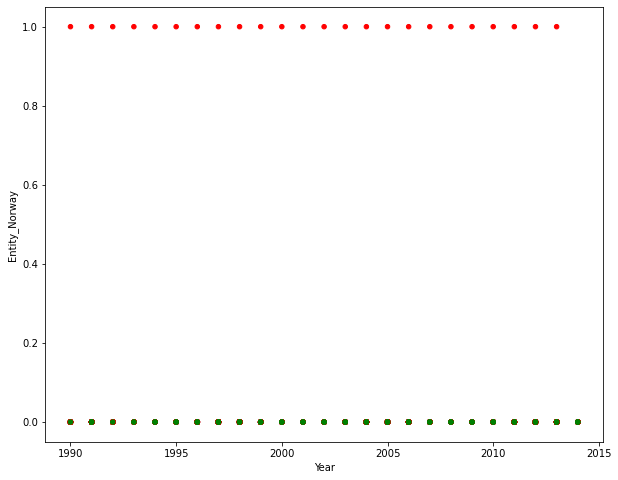

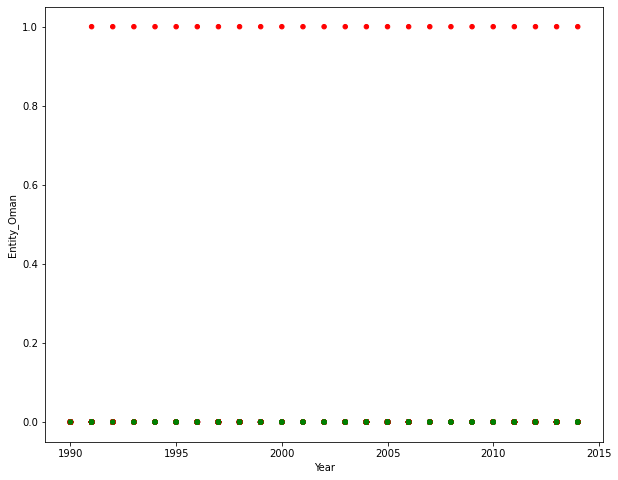

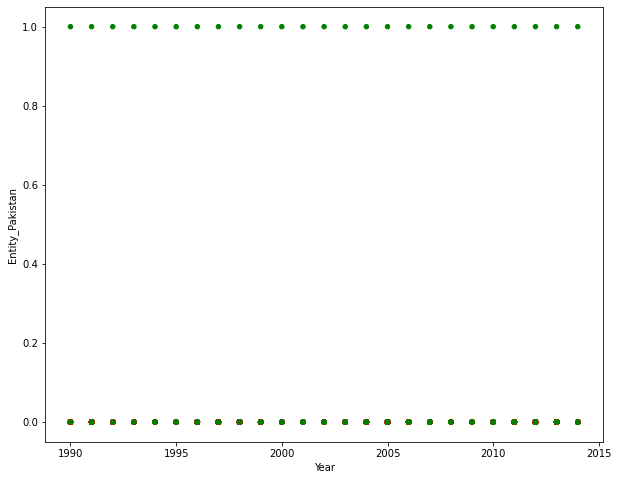

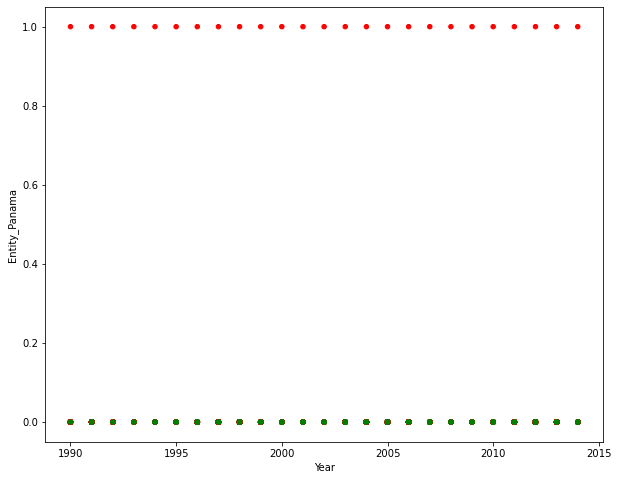

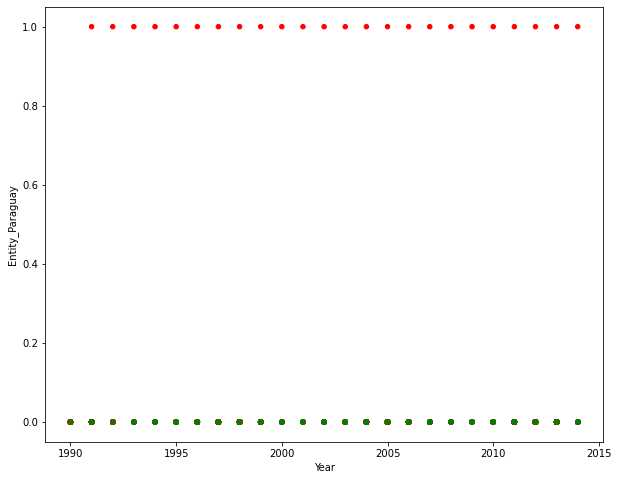

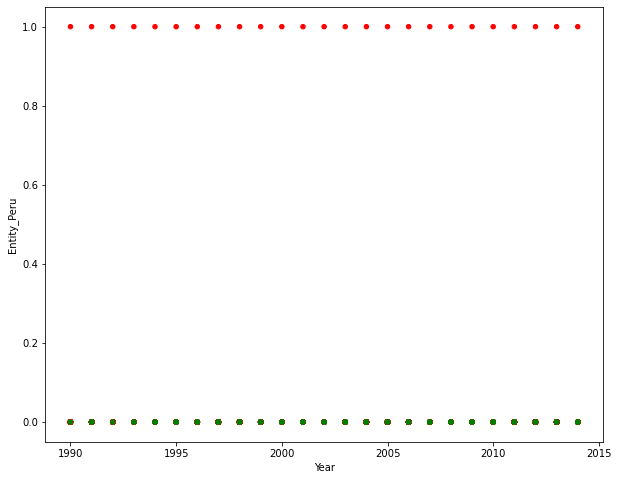

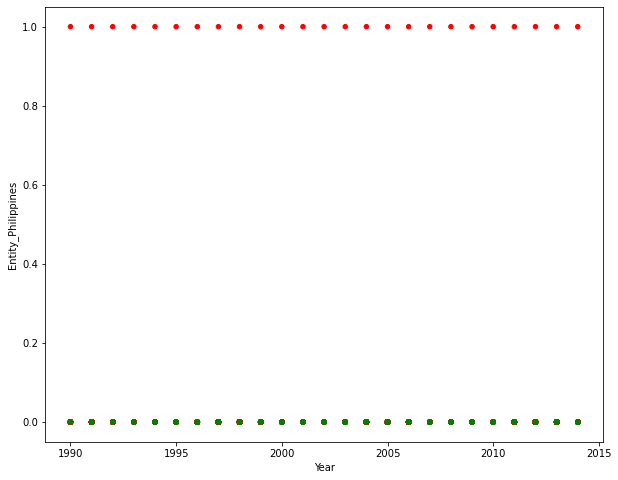

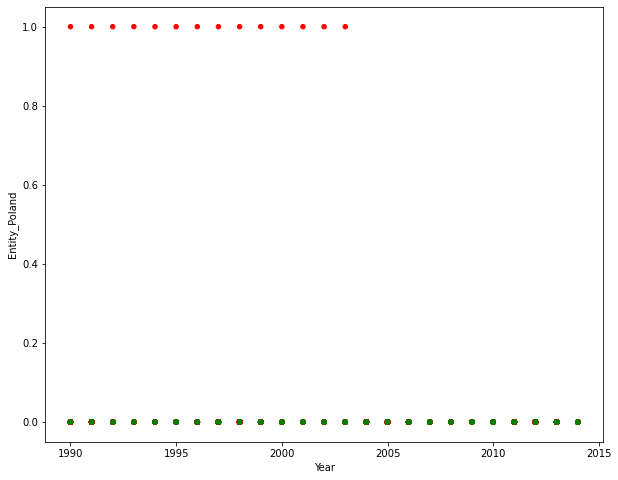

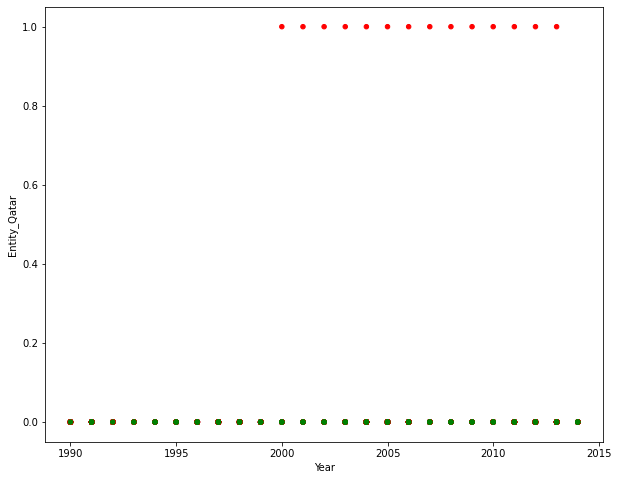

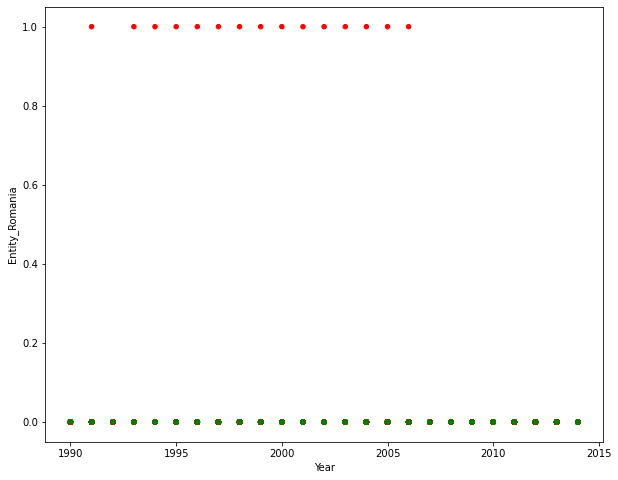

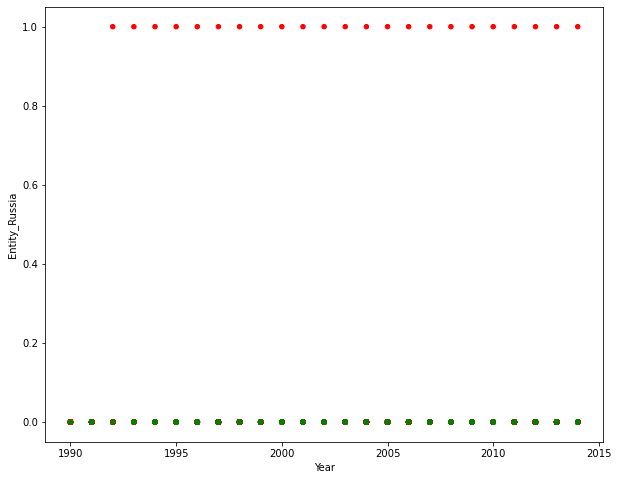

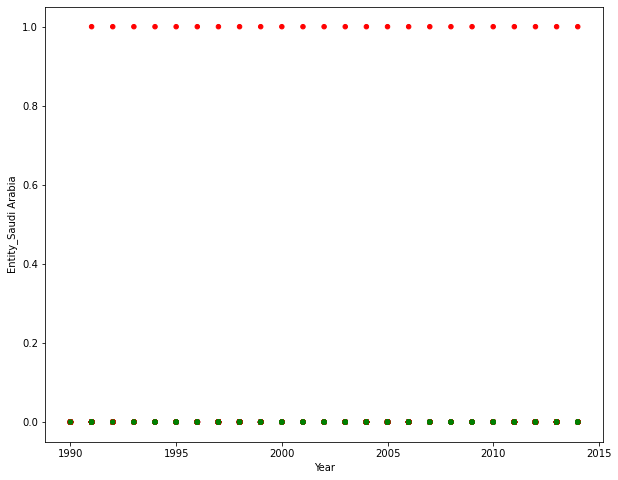

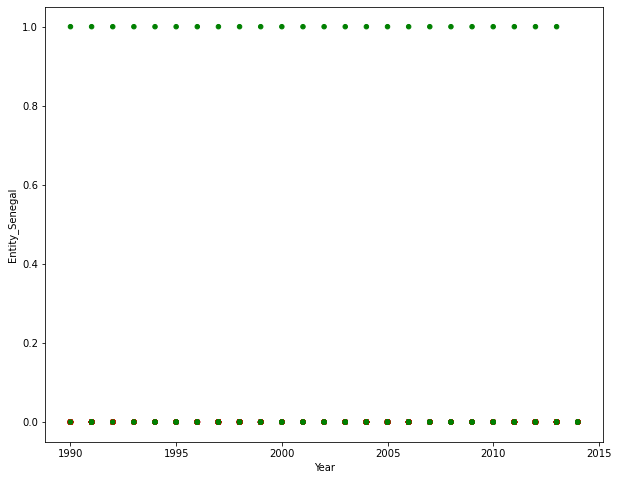

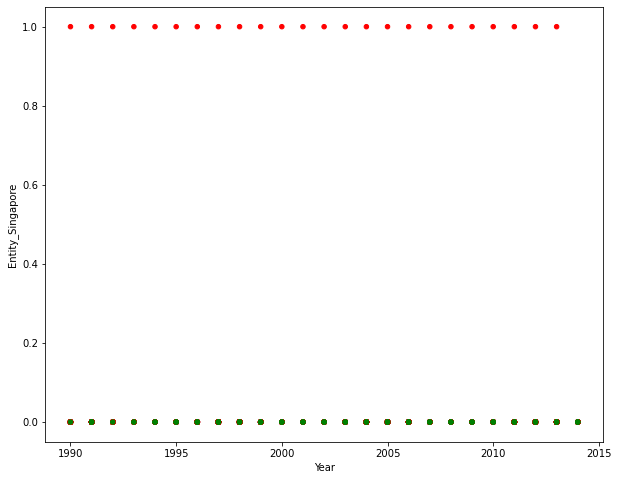

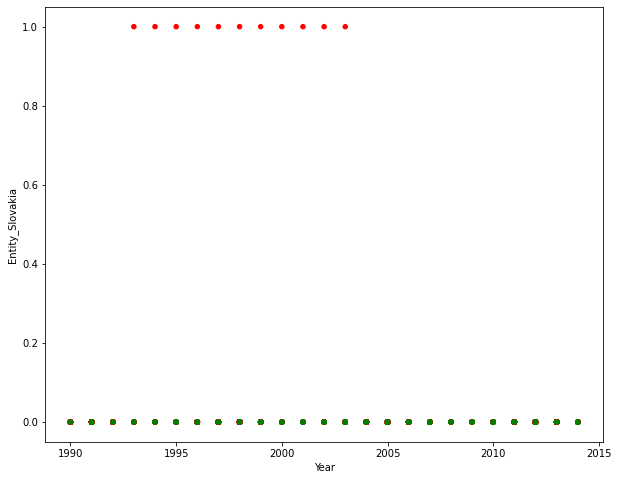

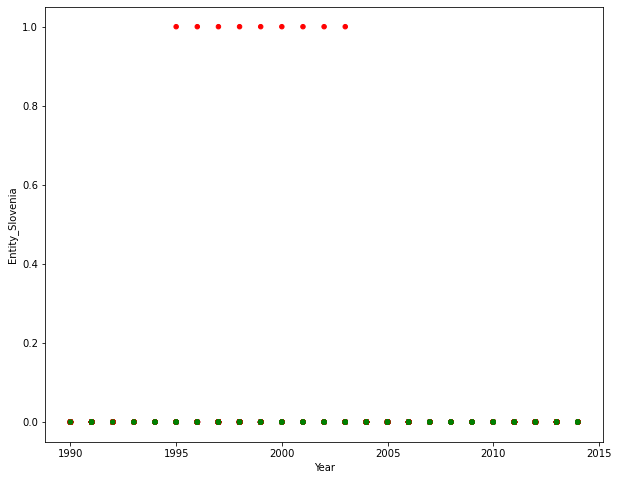

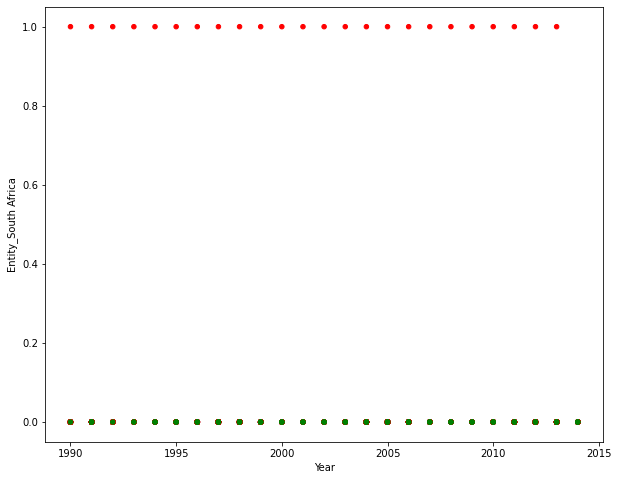

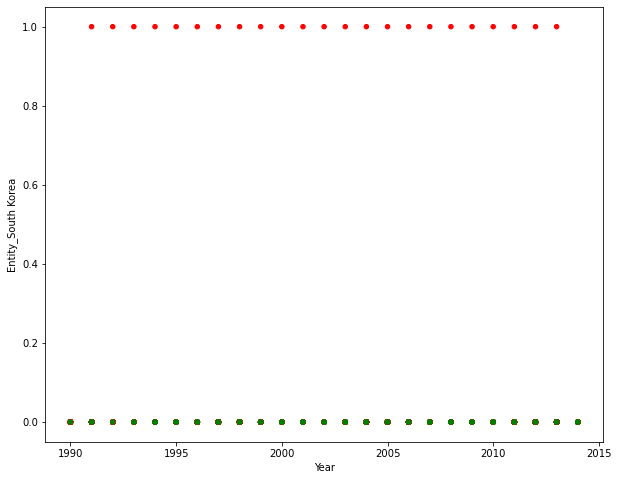

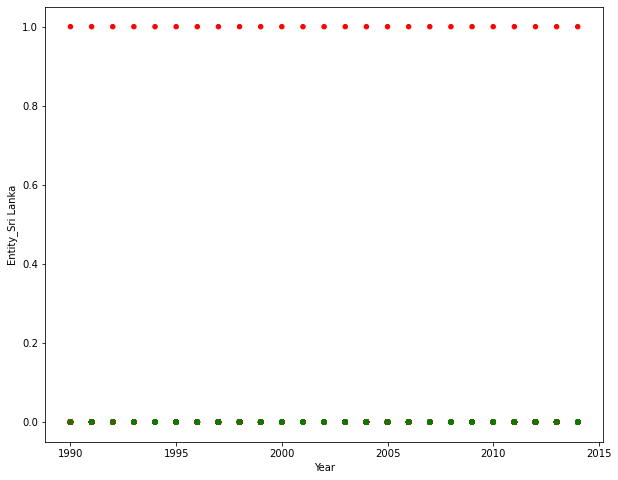

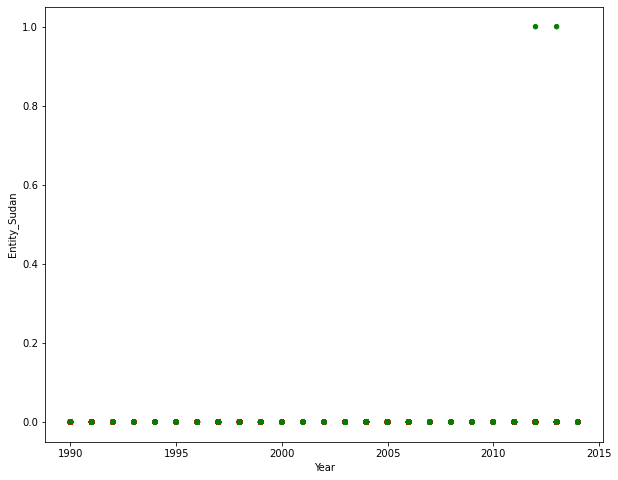

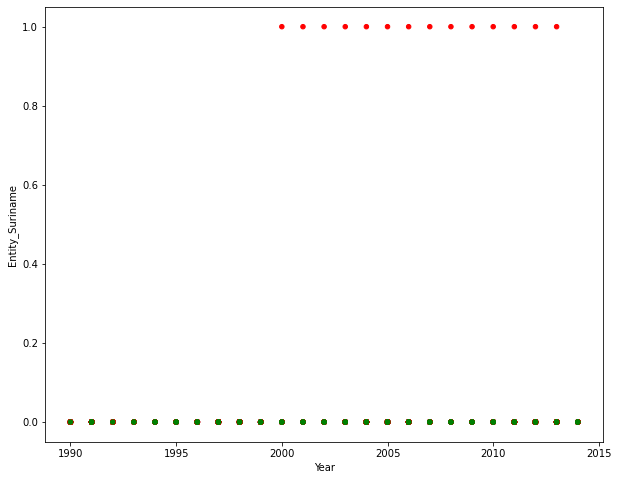

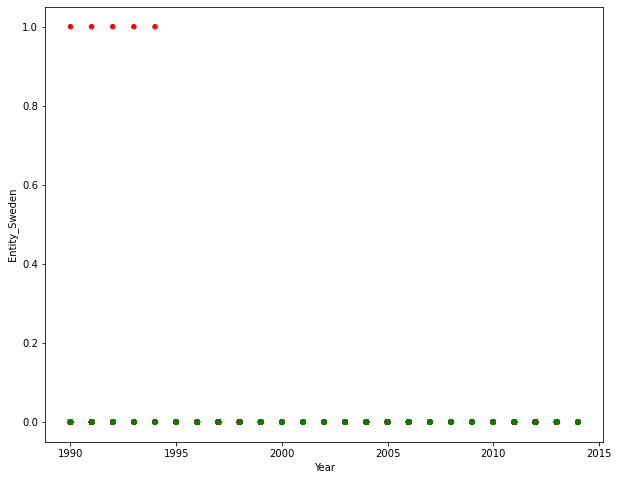

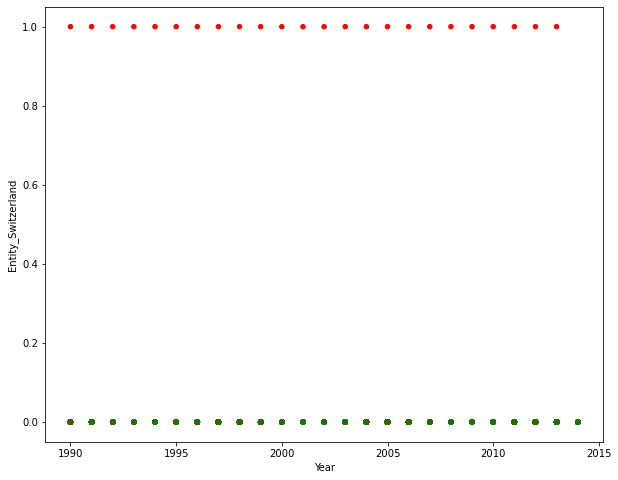

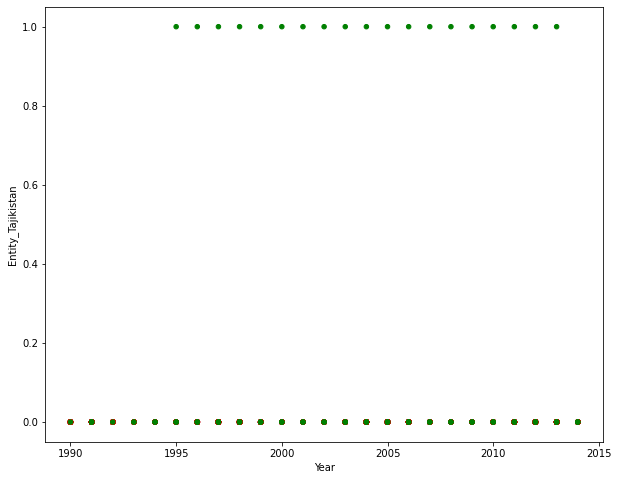

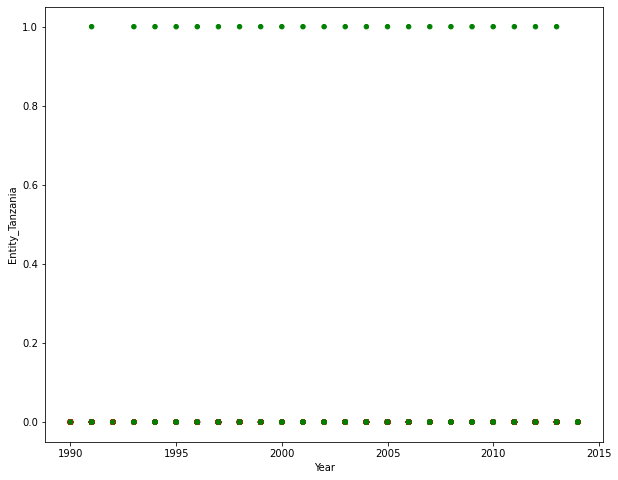

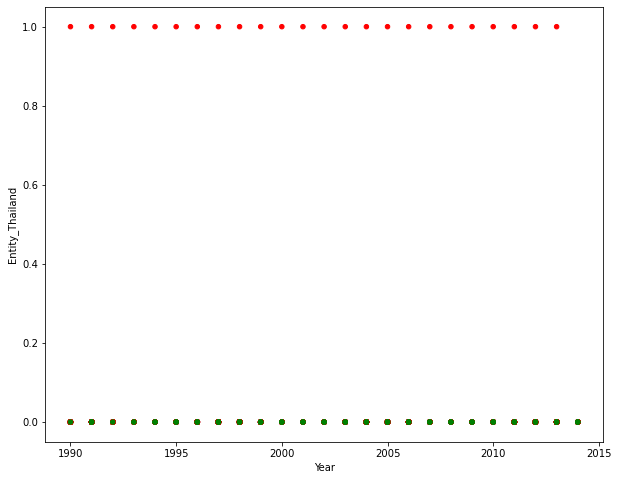

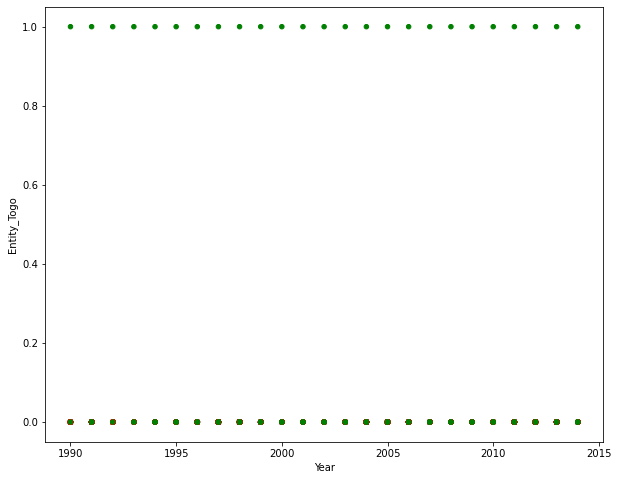

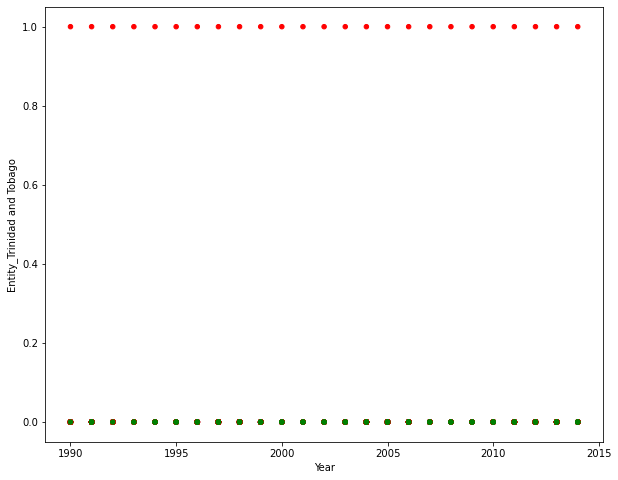

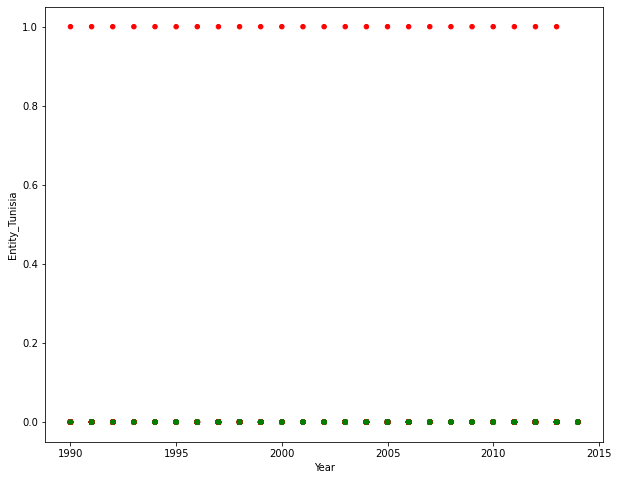

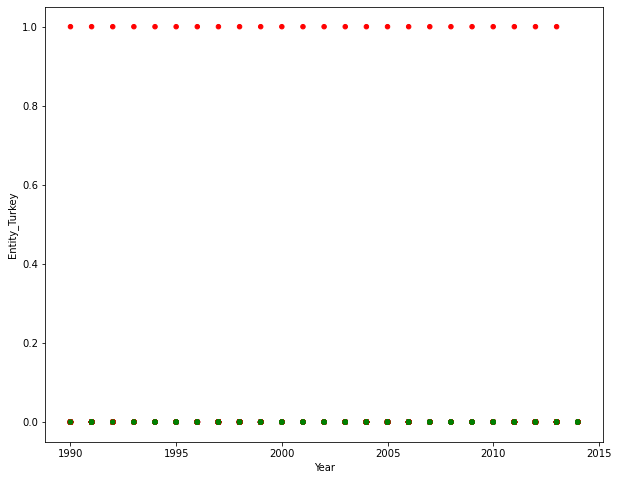

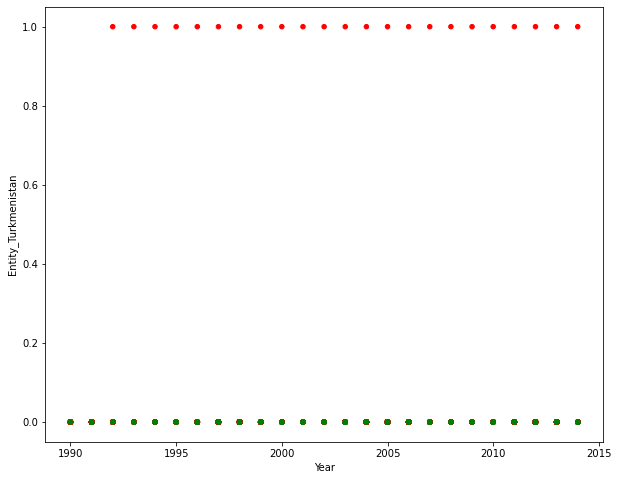

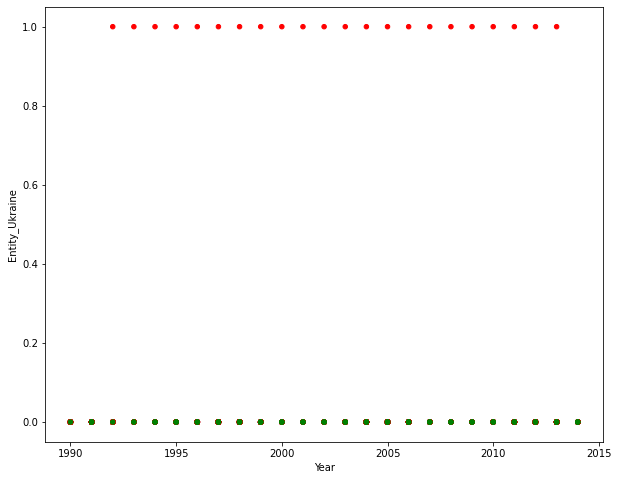

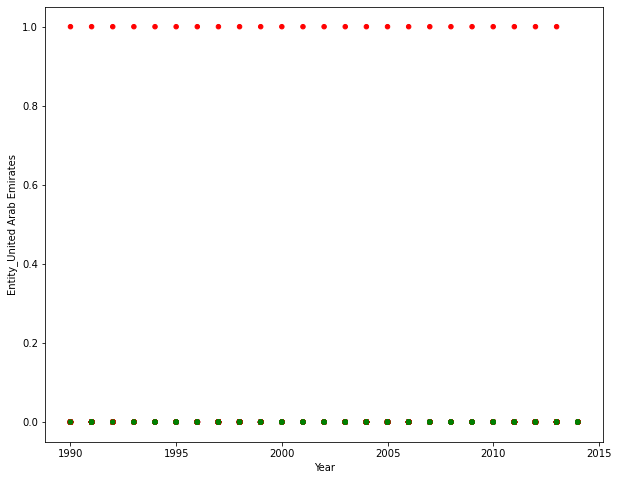

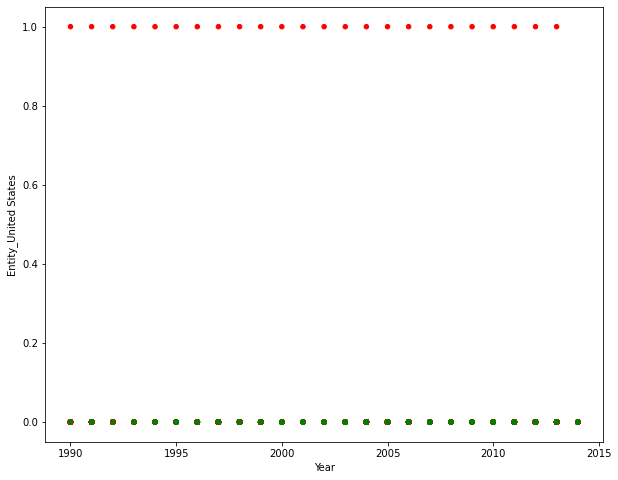

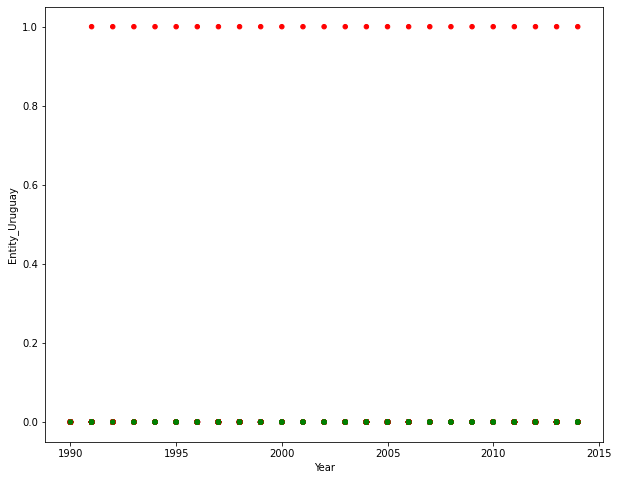

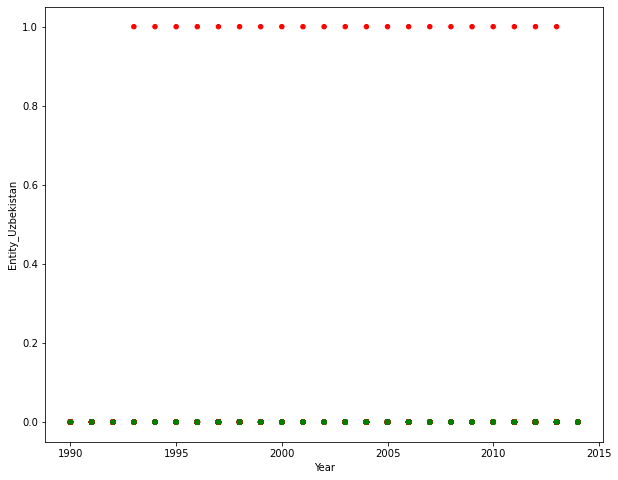

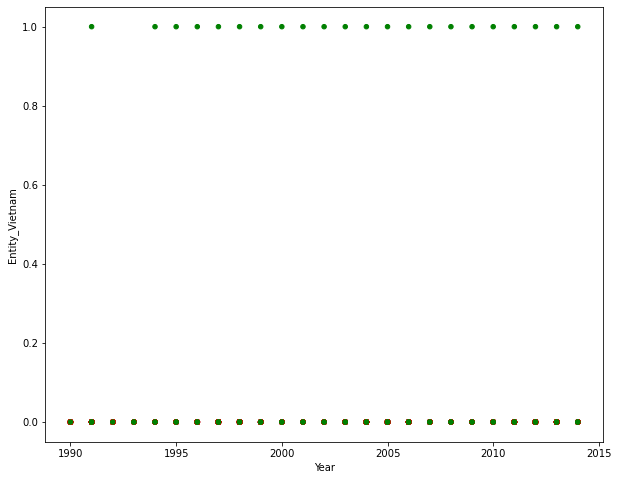

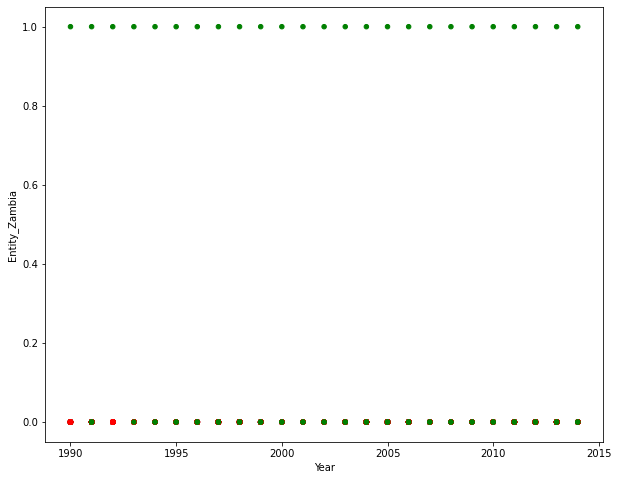

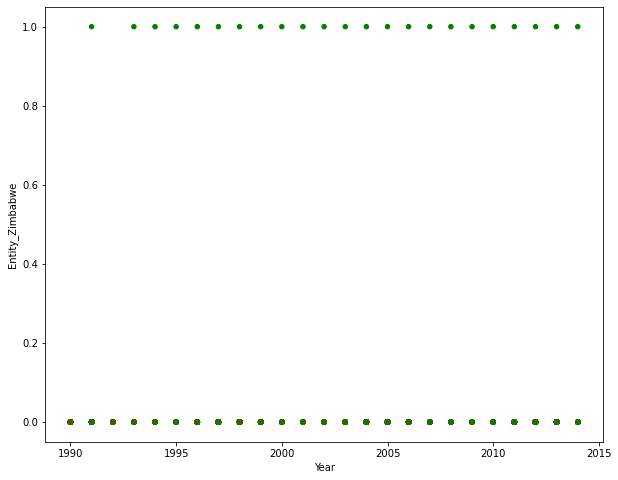

In [41]:
for x in columns.drop('Year'):
    colors = ["red", "green", "blue"]
    kahuna['color'] = kahuna['cluster'].map(lambda p: colors[p])

    ax = kahuna.plot(    
        kind="scatter", 
        x="Year", y=x,
        figsize=(10,8),
        c = kahuna['color']
    );